# APPLIED AI ASSIGNMENT

# IKO TAMBAYA'S NOTEBOOK

# Import Libraries

In [ ]:
#!pip install keras
#!pip install tensorflow

In [5]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os
import glob
from sklearn.datasets import load_files
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from keras.models import Model
from tensorflow.keras.models import Model
from graphviz import Digraph
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, precision_recall_curve,
    classification_report, confusion_matrix
)
import numpy as np
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from sklearn.preprocessing import label_binarize
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Input
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from sklearn.metrics import f1_score, roc_auc_score, precision_recall_curve, auc, roc_curve
from scipy.interpolate import interp1d
from tensorflow.keras.layers import Activation, Permute, Multiply, Lambda
from tensorflow.keras import backend as K
from sklearn.metrics import f1_score, roc_auc_score, precision_recall_curve, auc, roc_curve
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GRU, ZeroPadding1D

# Loading and Preprocessing the Data

In [6]:
# Paths to training and testing data
train_dir = '20news-bydate/20news-bydate-train'
test_dir = '20news-bydate/20news-bydate-test'

# newsgroups directories in the training data folder
train_newsgroups = os.listdir(train_dir)

# newsgroups directories in the test data folder
test_newsgroups = os.listdir(test_dir)

# Display the names of the newsgroups in the train and test data
print(f'Newsgroups in training data: {train_newsgroups}')
print(f'Newsgroups in test data: {test_newsgroups}')

Newsgroups in training data: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
Newsgroups in test data: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [4]:
# Download stopwords and lemmatizer from NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to preprocess the text: remove special characters, tokenize, and lemmatize
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^A-Za-z\s]', '', text.lower())  # convert to lowercase
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and lemmatize each word
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
# Load the 20 Newsgroups dataset from the directory
train_data = load_files(train_dir, encoding='utf-8', decode_error='ignore', shuffle=True)
test_data = load_files(test_dir, encoding='utf-8', decode_error='ignore', shuffle=True)

# Preprocess the text data
train_texts = [preprocess_text(text) for text in train_data.data]
test_texts = [preprocess_text(text) for text in test_data.data]

# Encode the labels (newsgroups) into numeric values
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_data.target)
test_labels = label_encoder.transform(test_data.target)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=20000)
X_train = vectorizer.fit_transform(train_texts)
X_test = vectorizer.transform(test_texts)

# Check the shape of the data to ensure it's loaded properly
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Number of unique classes: {len(label_encoder.classes_)}')

X_train shape: (11314, 20000)
X_test shape: (7532, 20000)
Number of unique classes: 20


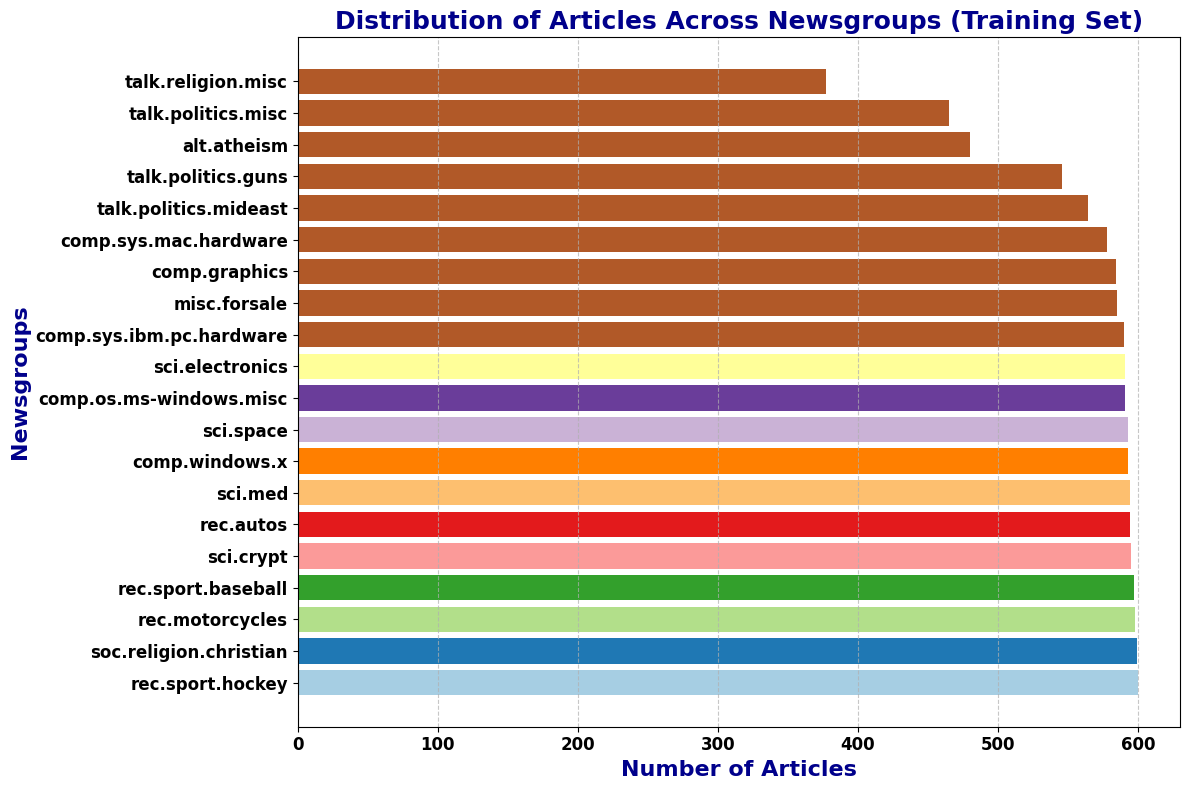

In [7]:
# Get the number of articles per newsgroup in the training set
train_newsgroup_sizes = {newsgroup: len(os.listdir(os.path.join(train_dir, newsgroup))) for newsgroup in train_newsgroups}

# Sort the newsgroups by the number of articles
sorted_train_newsgroups = sorted(train_newsgroup_sizes.items(), key=lambda x: x[1], reverse=True)

# Prepare data for plotting
newsgroups_labels, counts = zip(*sorted_train_newsgroups)

# Create the bar plot
plt.figure(figsize=(12, 8))

# Horizontal bar plot with color gradient
plt.barh(newsgroups_labels, counts, color=plt.cm.Paired(range(len(counts))))

# Adding labels and title
plt.xlabel('Number of Articles', fontsize=16, fontweight='bold', color='darkblue')
plt.ylabel('Newsgroups', fontsize=16, fontweight='bold', color='darkblue')
plt.title('Distribution of Articles Across Newsgroups (Training Set)', fontsize=18, fontweight='bold', color='darkblue')

# Add gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust the font size of the tick labels
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Tight layout to avoid label overlap
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('train_newsgroups_distribution.png', dpi=300)

# Show the plot
plt.show()

# Train and Test Traditional Machine Learning Models

# Training Naive Bayes Classifier

Naive Bayes Accuracy: 0.8238
Classification Report (Naive Bayes):
                          precision    recall  f1-score   support

             alt.atheism       0.81      0.64      0.71       319
           comp.graphics       0.71      0.74      0.73       389
 comp.os.ms-windows.misc       0.77      0.70      0.73       394
comp.sys.ibm.pc.hardware       0.66      0.80      0.73       392
   comp.sys.mac.hardware       0.83      0.86      0.85       385
          comp.windows.x       0.86      0.79      0.82       395
            misc.forsale       0.87      0.79      0.83       390
               rec.autos       0.90      0.92      0.91       396
         rec.motorcycles       0.92      0.95      0.94       398
      rec.sport.baseball       0.94      0.95      0.94       397
        rec.sport.hockey       0.94      0.98      0.96       399
               sci.crypt       0.83      0.95      0.89       396
         sci.electronics       0.82      0.71      0.76       393
         

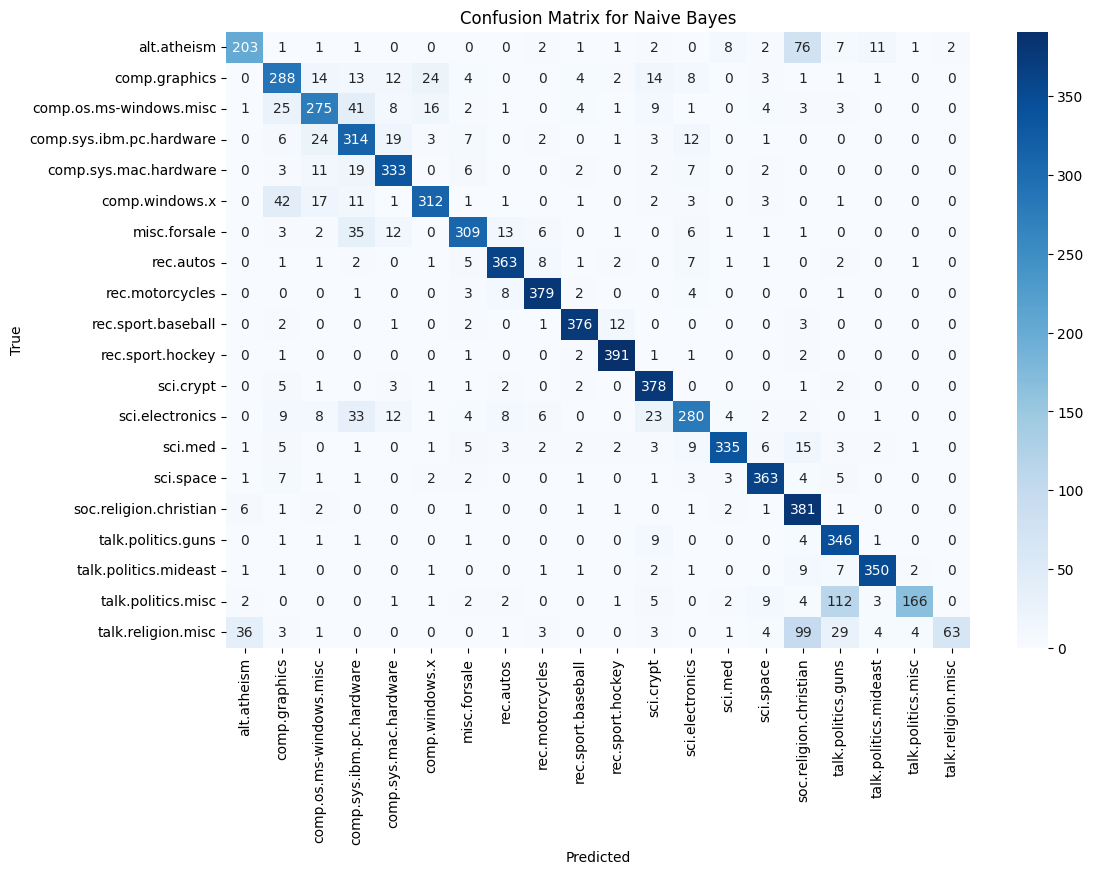

In [6]:
# Train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, train_labels)

# Predict the test data
nb_predictions = nb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(test_labels, nb_predictions)
print(f"Naive Bayes Accuracy: {accuracy:.4f}")

# Classification report
print("Classification Report (Naive Bayes):")
print(classification_report(test_labels, nb_predictions, target_names=train_data.target_names))

# Confusion Matrix
cm = confusion_matrix(test_labels, nb_predictions)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_data.target_names, yticklabels=train_data.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Naive Bayes')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

Naive Bayes F1 Score: 0.8077
Naive Bayes ROC-AUC Score: 0.9846
Naive Bayes Macro-averaged PR-AUC Score: -0.8526


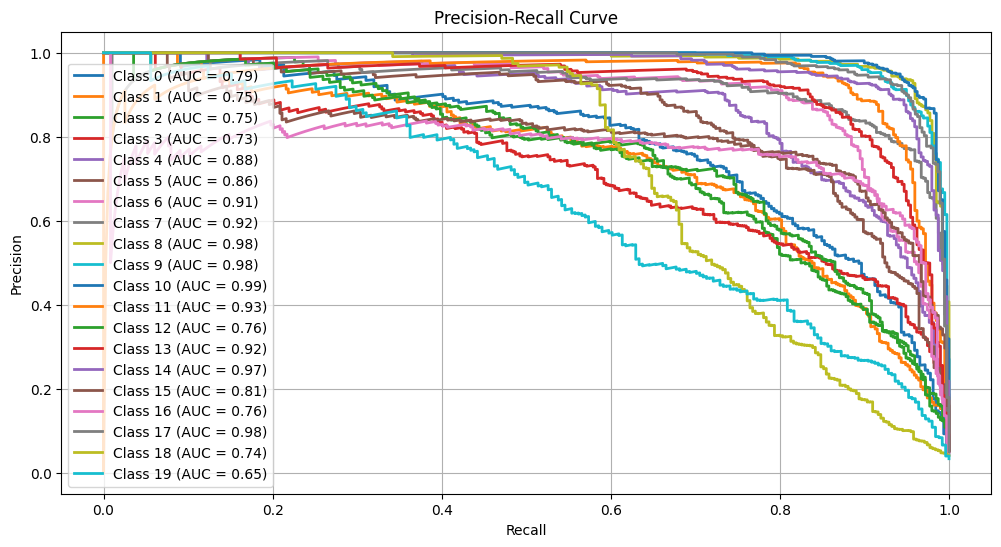

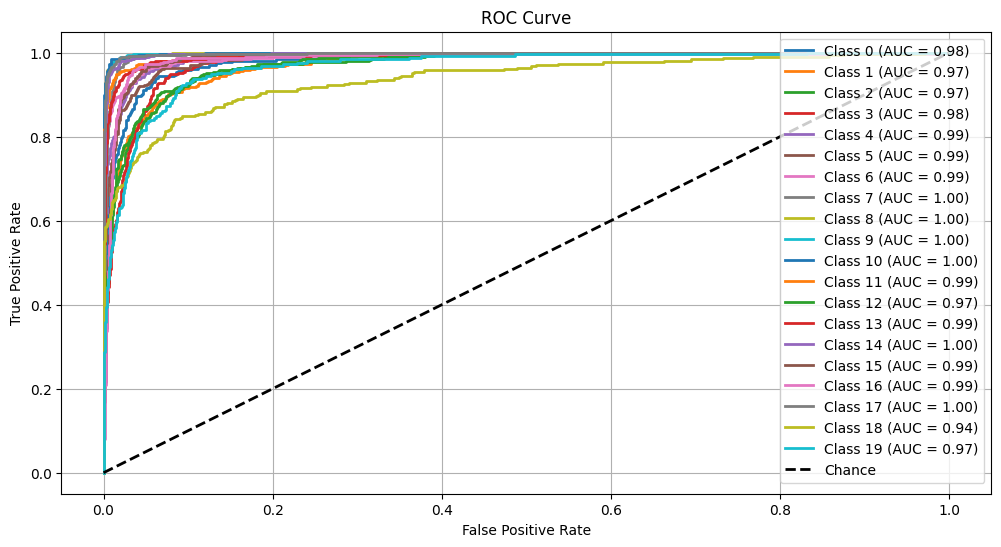

In [7]:
# Calculate F1 score
f1 = f1_score(test_labels, nb_predictions, average='macro')  # Macro-average for multiple classes
print(f"Naive Bayes F1 Score: {f1:.4f}")

# ROC-AUC
# First, get predicted probabilities for the test data
nb_probabilities = nb_model.predict_proba(X_test)

# Calculate macro-averaged ROC-AUC
roc_auc = roc_auc_score(test_labels, nb_probabilities, multi_class='ovr', average='macro')
print(f"Naive Bayes ROC-AUC Score: {roc_auc:.4f}")

# PR-AUC (Precision-Recall AUC)
# Binarize test labels for PR-AUC calculation
test_labels_binarized = label_binarize(test_labels, classes=np.unique(test_labels))

# Calculate PR-AUC for each class
pr_auc_scores = []
for i in range(test_labels_binarized.shape[1]):
    precision, recall, _ = precision_recall_curve(test_labels_binarized[:, i], nb_probabilities[:, i])
    pr_auc = np.trapz(precision, recall)  # Area under the precision-recall curve
    pr_auc_scores.append(pr_auc)

# Calculate macro-averaged PR-AUC
macro_pr_auc = np.mean(pr_auc_scores)
print(f"Naive Bayes Macro-averaged PR-AUC Score: {macro_pr_auc:.4f}")

# Binarize test labels for multi-class evaluation
test_labels_binarized = label_binarize(test_labels, classes=np.unique(test_labels))

# Plot Precision-Recall and ROC curves for each class
n_classes = test_labels_binarized.shape[1]

# Initialize figure for PR curve
plt.figure(figsize=(12, 6))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(test_labels_binarized[:, i], nb_probabilities[:, i])
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, lw=2, label=f'Class {i} (AUC = {pr_auc:.2f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

# Initialize figure for ROC curve
plt.figure(figsize=(12, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(test_labels_binarized[:, i], nb_probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label="Chance")  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

# Training Support Vector Machine (SVM)

SVM Accuracy: 0.8293
Classification Report (SVM):
                          precision    recall  f1-score   support

             alt.atheism       0.78      0.71      0.74       319
           comp.graphics       0.68      0.78      0.73       389
 comp.os.ms-windows.misc       0.78      0.71      0.74       394
comp.sys.ibm.pc.hardware       0.70      0.80      0.75       392
   comp.sys.mac.hardware       0.83      0.86      0.84       385
          comp.windows.x       0.83      0.75      0.79       395
            misc.forsale       0.78      0.87      0.82       390
               rec.autos       0.90      0.87      0.89       396
         rec.motorcycles       0.95      0.93      0.94       398
      rec.sport.baseball       0.92      0.93      0.93       397
        rec.sport.hockey       0.97      0.94      0.95       399
               sci.crypt       0.94      0.89      0.91       396
         sci.electronics       0.71      0.77      0.74       393
                 sci.med 

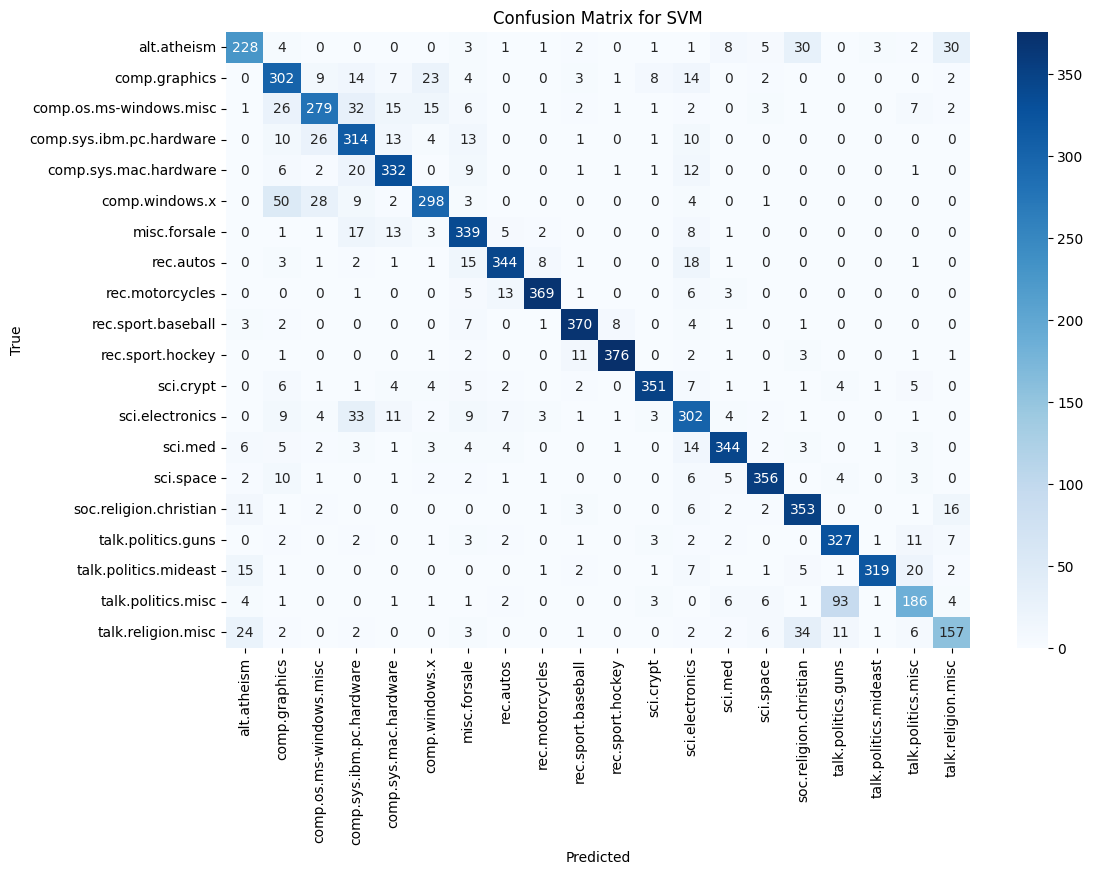

In [7]:
# Train the SVM model

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, train_labels)

# Predict the test data
svm_predictions = svm_model.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(test_labels, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy:.4f}")

# Classification report
print("Classification Report (SVM):")
print(classification_report(test_labels, svm_predictions, target_names=train_data.target_names))

# Confusion Matrix
cm_svm = confusion_matrix(test_labels, svm_predictions)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=train_data.target_names, yticklabels=train_data.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

SVM F1 Score: 0.8237
SVM ROC-AUC Score: 0.9802
SVM Macro-averaged PR-AUC Score: 0.8340


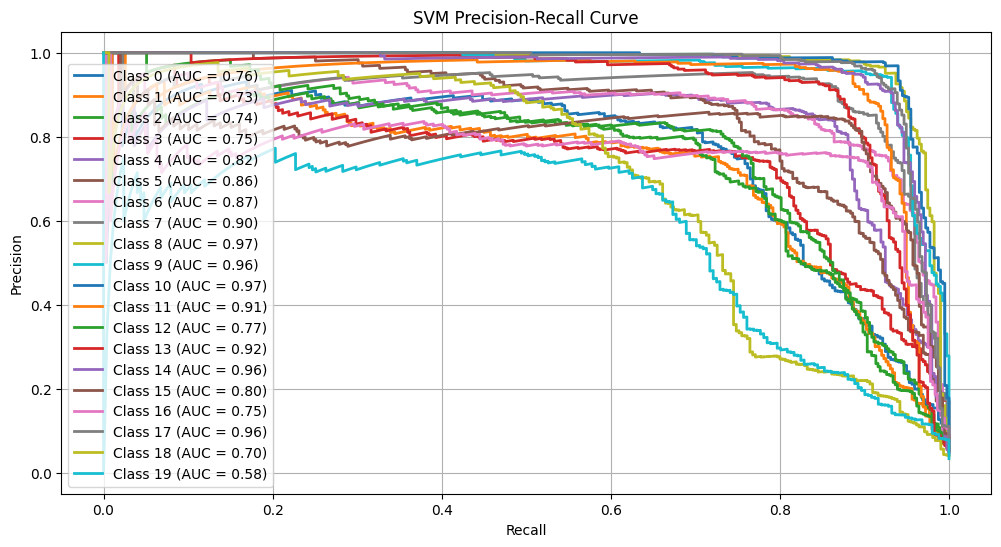

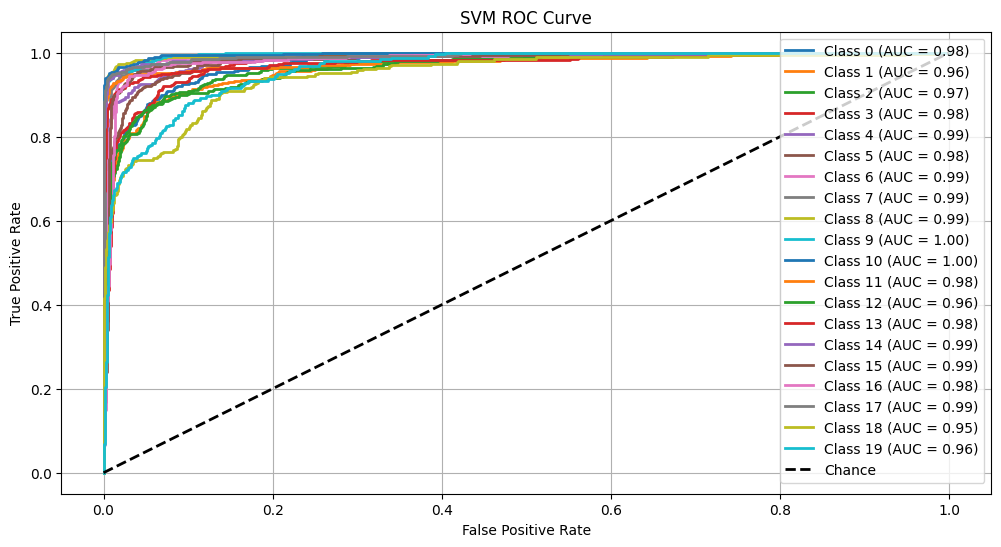

In [8]:
# Binarize test labels for multi-class evaluation
test_labels_binarized = label_binarize(test_labels, classes=np.unique(test_labels))

# SVM doesn't provide probability estimates by default; use decision_function for ROC and PR
svm_decision_scores = svm_model.decision_function(X_test)

# 1. F1 Score
svm_f1_score = f1_score(test_labels, svm_predictions, average='macro')
print(f"SVM F1 Score: {svm_f1_score:.4f}")

# 2. ROC-AUC (One-vs-Rest for multi-class)
svm_roc_auc = roc_auc_score(test_labels_binarized, svm_decision_scores, multi_class='ovr', average='macro')
print(f"SVM ROC-AUC Score: {svm_roc_auc:.4f}")

# 3. PR-AUC (Precision-Recall AUC)
pr_auc_scores = []
n_classes = test_labels_binarized.shape[1]

# Initialize figure for PR curve
plt.figure(figsize=(12, 6))

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(test_labels_binarized[:, i], svm_decision_scores[:, i])
    pr_auc = auc(recall, precision)  # PR-AUC for each class
    pr_auc_scores.append(pr_auc)
    plt.plot(recall, precision, lw=2, label=f'Class {i} (AUC = {pr_auc:.2f})')

# Macro-averaged PR-AUC
svm_macro_pr_auc = np.mean(pr_auc_scores)
print(f"SVM Macro-averaged PR-AUC Score: {svm_macro_pr_auc:.4f}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("SVM Precision-Recall Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

# 4. Plot ROC Curve
plt.figure(figsize=(12, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(test_labels_binarized[:, i], svm_decision_scores[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label="Chance")  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM ROC Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

# Deep Learning Models (LSTM, BiLSTM with Attention, CNN with Attention, GRU)

# LSTM Text Classifier with Pre-trained Word Embeddings

In [8]:
# Set maximum number of words for the embedding and sequence length
max_words = 20000  
max_seq_length = 500  

# Vectorize the text data using Tokenizer
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_texts)

# Convert texts to sequences
X_train_model_1 = tokenizer.texts_to_sequences(train_texts)
X_test_model_1 = tokenizer.texts_to_sequences(test_texts)

# Pad the sequences
#X_train_pad = pad_sequences(X_train_seq_limited, maxlen=max_sequence_length, padding='post', truncating='post')
#X_test_pad = pad_sequences(X_test_seq_limited, maxlen=max_sequence_length, padding='post', truncating='post')

# Pad sequences to ensure uniform length
X_train_model_1 = pad_sequences(X_train_model_1, maxlen=max_seq_length)
X_test_model_1 = pad_sequences(X_test_model_1, maxlen=max_seq_length)

# Load pretrained GloVe embeddings
embedding_index_model_1 = {}
embedding_dim = 100  # GloVe dimensions
embedding_file = "glove.6B/glove.6B.100d.txt"  # location of the pre-trained embedding file

with open(embedding_file, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index_model_1[word] = coefs

# Prepare embedding matrix for the model
embedding_matrix_model_1 = np.zeros((max_words, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < max_words:
        embedding_vector = embedding_index_model_1.get(word)
        if embedding_vector is not None:
            embedding_matrix_model_1[i] = embedding_vector

In [9]:
# Build the LSTM model
input_layer_model_1 = Input(shape=(max_seq_length,), dtype='int32')

# Embedding layer with pre-trained embeddings
embedding_layer_model_1 = Embedding(input_dim=max_words,
                                    output_dim=embedding_dim,
                                    weights=[embedding_matrix_model_1],
                                    trainable=False)(input_layer_model_1)

# LSTM layer
lstm_layer_model_1 = LSTM(128, dropout=0.2, recurrent_dropout=0.2)(embedding_layer_model_1)

# Fully connected layers
dense_layer_model_1 = Dense(64, activation='relu')(lstm_layer_model_1)
dropout_layer_model_1 = Dropout(0.5)(dense_layer_model_1)
output_layer_model_1 = Dense(len(label_encoder.classes_), activation='softmax')(dropout_layer_model_1)

# Create the model
model_1 = Model(inputs=input_layer_model_1, outputs=output_layer_model_1)

# Compile the model
model_1.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Print the model summary
model_1.summary()

# Train the model
history_model_1 = model_1.fit(X_train_model_1, train_labels, batch_size=64, epochs=50, validation_data=(X_test_model_1, test_labels))

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 500, 100)            │       2,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │           1,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,126,804 (8.11 MB)

 Trainable params: 126,804 (495.33 KB)

 Non-trainable params: 2,000,000 (7.63 MB)

Epoch 1/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 86s 471ms/step - accuracy: 0.1023 - loss: 2.8826 - val_accuracy: 0.2181 - val_loss: 2.3712
Epoch 2/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 81s 459ms/step - accuracy: 0.2089 - loss: 2.3772 - val_accuracy: 0.3348 - val_loss: 1.9133
Epoch 3/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 86s 484ms/step - accuracy: 0.2891 - loss: 2.0836 - val_accuracy: 0.4178 - val_loss: 1.6504
Epoch 4/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 139s 465ms/step - accuracy: 0.3756 - loss: 1.8219 - val_accuracy: 0.4922 - val_loss: 1.4483
Epoch 5/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 149s 502ms/step - accuracy: 0.4385 - loss: 1.5913 - val_accuracy: 0.5315 - val_loss: 1.3633
Epoch 6/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 141s 494ms/step - accuracy: 0.4958 - loss: 1.4743 - val_accuracy: 0.5665 - val_loss: 1.2386
Epoch 7/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 93s 527ms/step - accuracy: 0.5347 - loss: 1.3501 - val_accuracy: 0.6014 - val_loss: 1.1726
Epoch 8/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 139s 509ms/step - accuracy: 0.5606 - los

236/236 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - accuracy: 0.7731 - loss: 0.9067
Model 1 Test accuracy: 0.7732341885566711


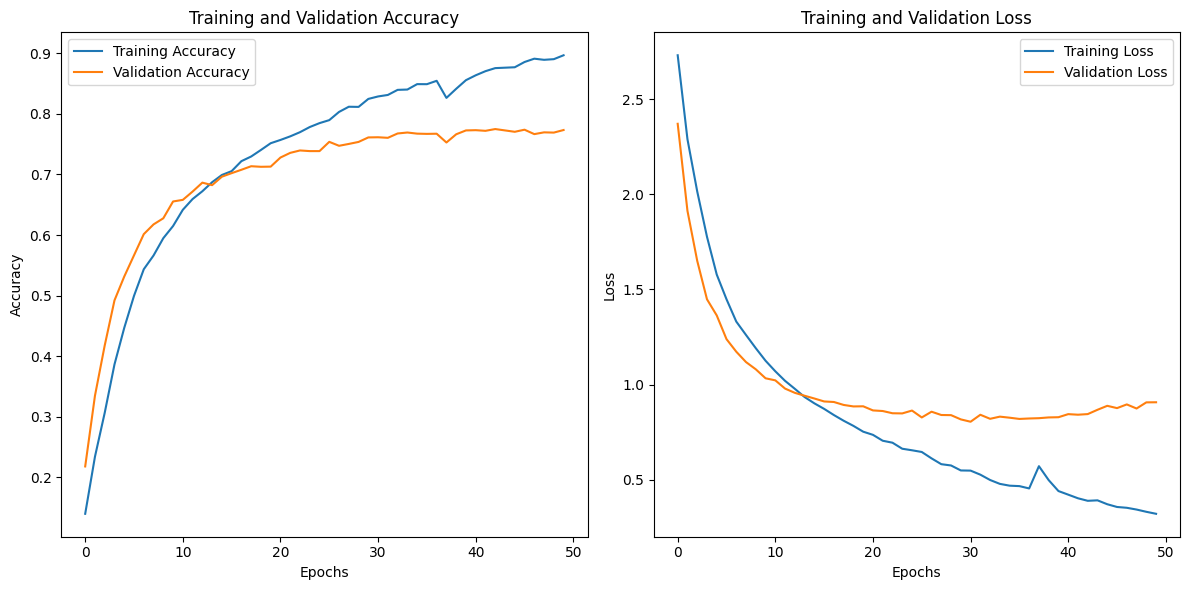

In [10]:
# Evaluate the model on the test data
loss_model_1, accuracy_model_1 = model_1.evaluate(X_test_model_1, test_labels)
print(f'Model 1 Test accuracy: {accuracy_model_1}')

# Train the model
#history_model_1 = model_1.fit(X_train_model_1, train_labels, epochs=1, batch_size=64, validation_data=(X_test_model_1, test_labels))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_model_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_model_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_model_1.history['loss'], label='Training Loss')
plt.plot(history_model_1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

236/236 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step
Model 1 F1 Score: 0.7667
Model 1 ROC-AUC Score: 0.9796
Model 1 Macro-averaged PR-AUC Score: 0.8243


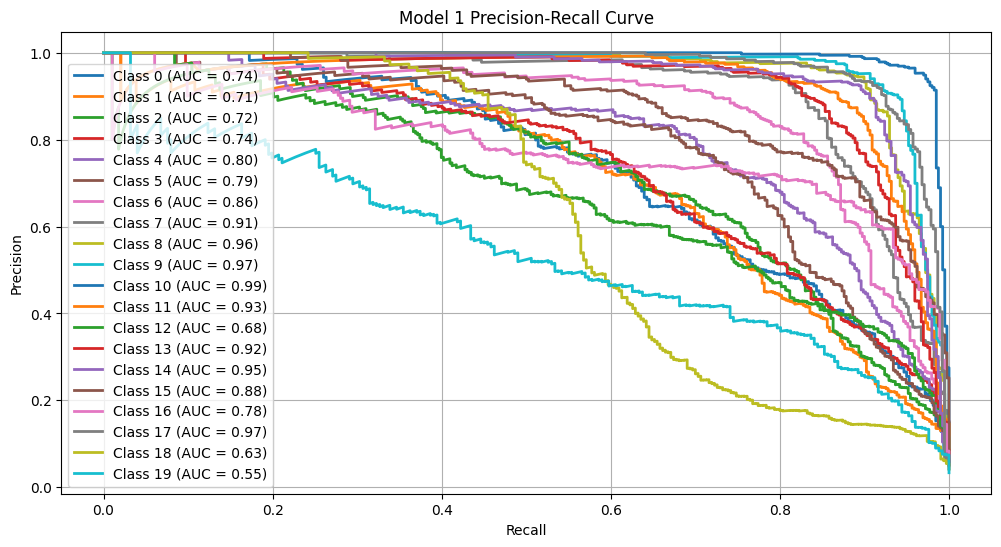

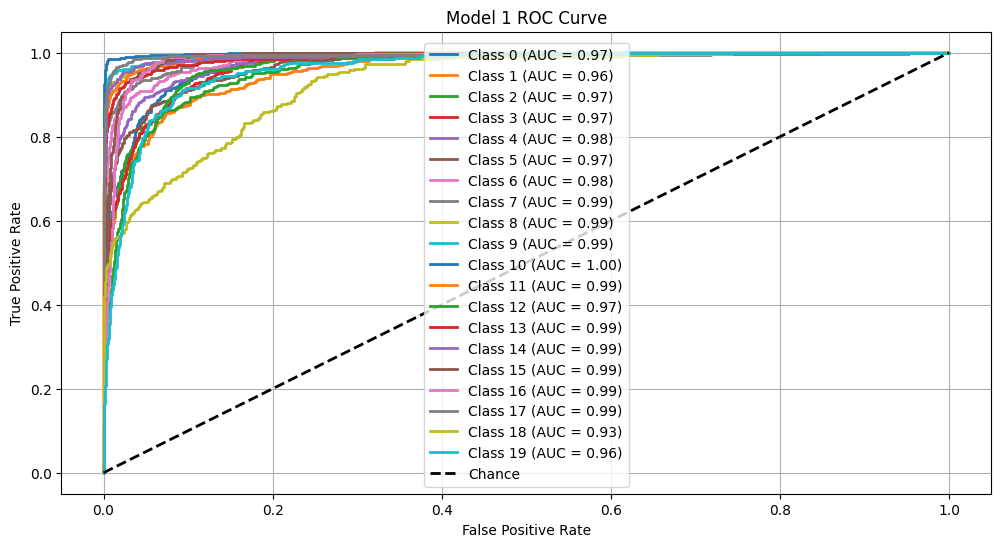

In [11]:
# Predictions and probabilities
model_1_probabilities = model_1.predict(X_test_model_1)  # Predicted probabilities
model_1_predictions = np.argmax(model_1_probabilities, axis=1)  # Predicted labels

# Binarize the test labels
test_labels_binarized = label_binarize(test_labels, classes=np.unique(test_labels))
n_classes = test_labels_binarized.shape[1]

# 1. F1 Score
f1_model_1 = f1_score(test_labels, model_1_predictions, average='macro')
print(f"Model 1 F1 Score: {f1_model_1:.4f}")

# 2. ROC-AUC (One-vs-Rest for multi-class)
roc_auc_model_1 = roc_auc_score(test_labels_binarized, model_1_probabilities, multi_class='ovr', average='macro')
print(f"Model 1 ROC-AUC Score: {roc_auc_model_1:.4f}")

# 3. PR-AUC (Precision-Recall AUC)
pr_auc_scores = []

# Initialize figure for PR curve
plt.figure(figsize=(12, 6))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(test_labels_binarized[:, i], model_1_probabilities[:, i])
    pr_auc = auc(recall, precision)  # PR-AUC for each class
    pr_auc_scores.append(pr_auc)
    plt.plot(recall, precision, lw=2, label=f'Class {i} (AUC = {pr_auc:.2f})')

# Macro-averaged PR-AUC
macro_pr_auc_model_1 = np.mean(pr_auc_scores)
print(f"Model 1 Macro-averaged PR-AUC Score: {macro_pr_auc_model_1:.4f}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Model 1 Precision-Recall Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

# 4. Plot ROC Curve
plt.figure(figsize=(12, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(test_labels_binarized[:, i], model_1_probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label="Chance")  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Model 1 ROC Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

# BILSTM Model

In [18]:
# Define the model
input_layer = Input(shape=(max_seq_length,), dtype='int32')

# Embedding layer
embedding_layer = Embedding(input_dim=max_words, 
                            output_dim=embedding_dim, 
                            weights=[embedding_matrix_model_1], 
                            trainable=True)(input_layer)

# Bidirectional LSTM layers
bilstm_layer = Bidirectional(LSTM(128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True))(embedding_layer)
lstm_layer = LSTM(128, dropout=0.3, recurrent_dropout=0.3)(bilstm_layer)

# Fully connected layers
dense_layer = Dense(128, activation='relu')(lstm_layer)
batch_norm = BatchNormalization()(dense_layer)
dropout_layer = Dropout(0.4)(batch_norm)
output_layer = Dense(len(label_encoder.classes_), activation='softmax')(dropout_layer)

# Compile the model
model_2 = Model(inputs=input_layer, outputs=output_layer)
model_2.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model_2.summary()

# Callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True, verbose=1)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# Train the model
history_bilstm = model_2.fit(X_train_model_1, 
                    train_labels, 
                    batch_size=64, 
                    epochs=20, 
                    validation_data=(X_test_model_1, test_labels), 
                    callbacks=[early_stopping, lr_scheduler])

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_3 (Embedding)              │ (None, 500, 100)            │       2,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 500, 256)            │         234,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 128)                 │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 20)                  │           2,580 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,451,220 (9.35 MB)

 Trainable params: 2,450,964 (9.35 MB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 585s 3s/step - accuracy: 0.1036 - loss: 3.2132 - val_accuracy: 0.2359 - val_loss: 2.3792 - learning_rate: 0.0010
Epoch 2/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 783s 4s/step - accuracy: 0.2554 - loss: 2.2383 - val_accuracy: 0.3980 - val_loss: 1.7472 - learning_rate: 0.0010
Epoch 3/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 583s 3s/step - accuracy: 0.4009 - loss: 1.7271 - val_accuracy: 0.4409 - val_loss: 1.5632 - learning_rate: 0.0010
Epoch 4/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 626s 3s/step - accuracy: 0.5113 - loss: 1.3711 - val_accuracy: 0.6083 - val_loss: 1.0917 - learning_rate: 0.0010
Epoch 5/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 594s 3s/step - accuracy: 0.6291 - loss: 1.0293 - val_accuracy: 0.6476 - val_loss: 0.9761 - learning_rate: 0.0010
Epoch 6/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 613s 3s/step - accuracy: 0.7147 - loss: 0.7947 - val_accuracy: 0.7070 - val_loss: 0.8587 - learning_rate: 0.0010
Epoch 7/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 595s 3s/step - accuracy: 0.7771 - loss: 0.

Model Test Loss: 0.7838
Model Test Accuracy: 0.8355


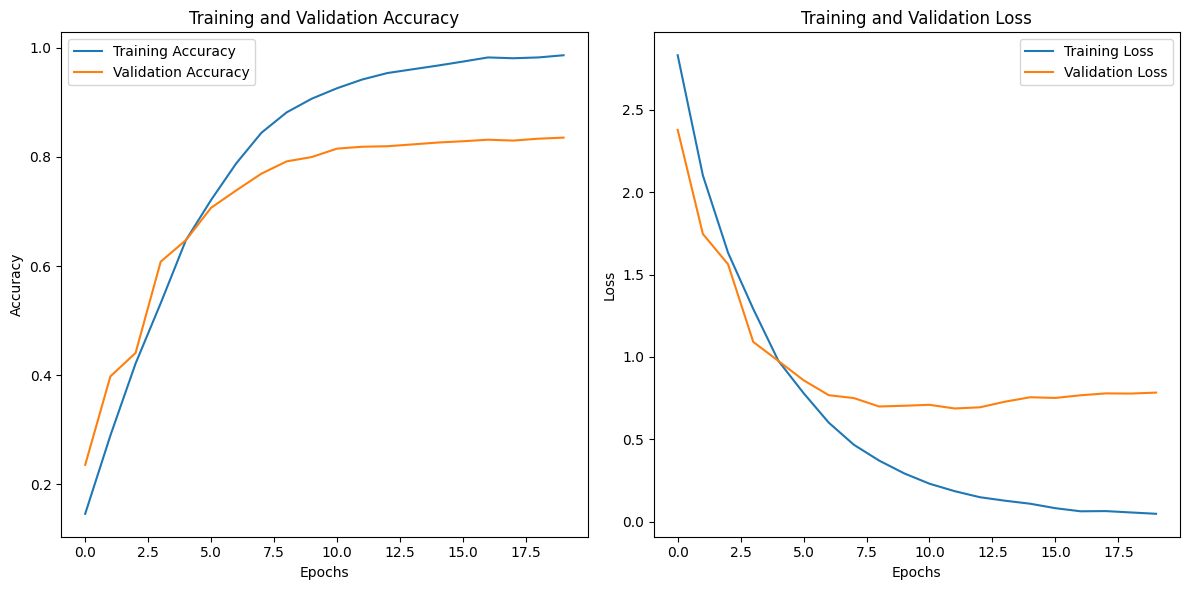

In [25]:
# Evaluate the model
loss, accuracy = model_2.evaluate(X_test_model_1, test_labels, verbose=0)
print(f'Model Test Loss: {loss:.4f}')
print(f'Model Test Accuracy: {accuracy:.4f}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_bilstm.history['accuracy'], label='Training Accuracy')
plt.plot(history_bilstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_bilstm.history['loss'], label='Training Loss')
plt.plot(history_bilstm.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

236/236 ━━━━━━━━━━━━━━━━━━━━ 62s 260ms/step
Model F1 Score (Weighted): 0.8347
Macro-averaged PR-AUC: 0.8898


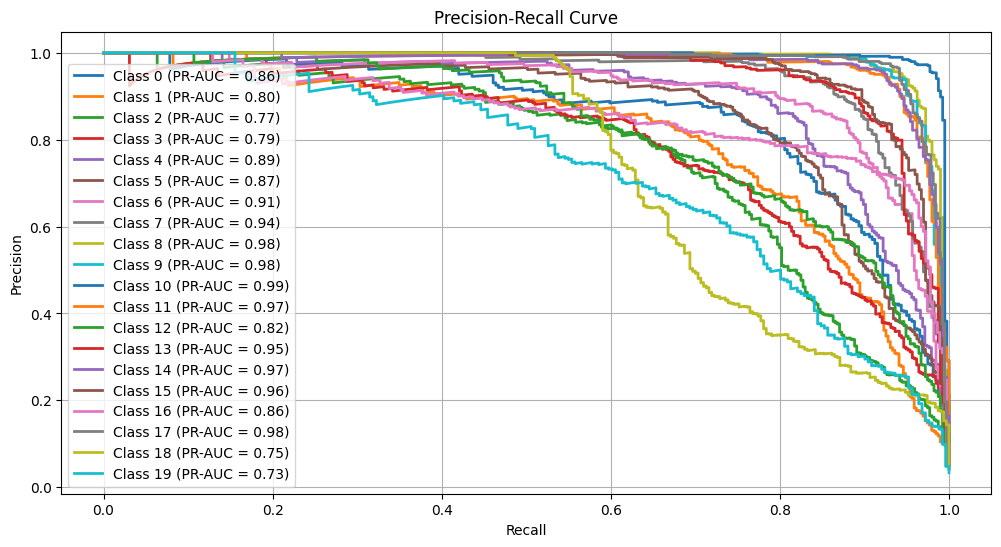

Macro-averaged ROC-AUC: 0.9880


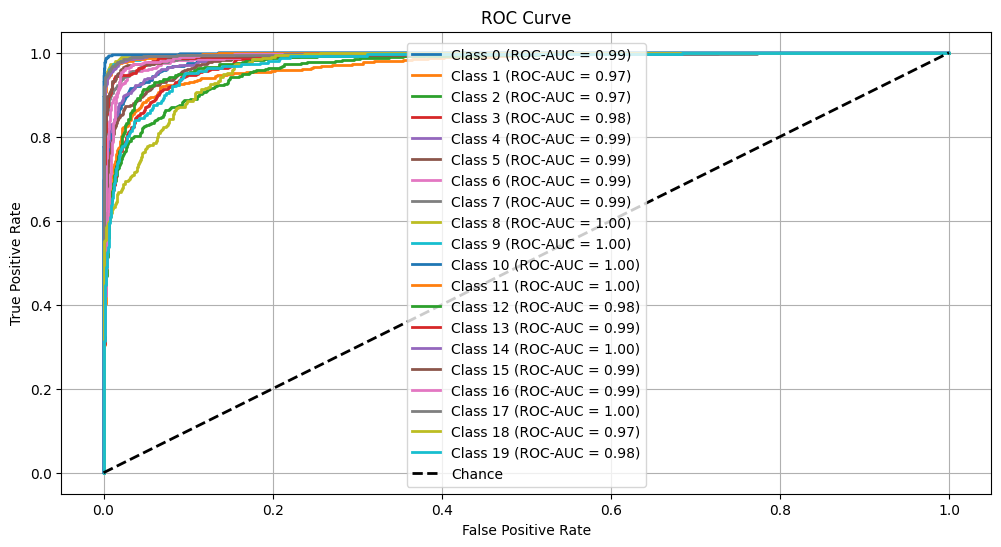

In [27]:
# Predict probabilities
y_pred_prob = model_2.predict(X_test_model_1)

# Convert test labels to binary format for multi-class evaluation
test_labels_binarized = label_binarize(test_labels, classes=range(len(label_encoder.classes_)))

# 1. F1 Score
y_pred_class = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class predictions
f1_model = f1_score(test_labels, y_pred_class, average='weighted')
print(f'Model F1 Score (Weighted): {f1_model:.4f}')

# Number of classes
n_classes = len(label_encoder.classes_)

# Initialize lists to store PR-AUC and ROC-AUC scores
pr_auc_scores = []
roc_auc_scores = []

# Precision-Recall Curve and PR-AUC
plt.figure(figsize=(12, 6))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(test_labels_binarized[:, i], y_pred_prob[:, i])
    pr_auc = auc(recall, precision)  # PR-AUC for each class
    pr_auc_scores.append(pr_auc)
    plt.plot(recall, precision, lw=2, label=f'Class {i} (PR-AUC = {pr_auc:.2f})')

# Macro-averaged PR-AUC
macro_pr_auc = np.mean(pr_auc_scores)
print(f"Macro-averaged PR-AUC: {macro_pr_auc:.4f}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

# ROC Curve and ROC-AUC
plt.figure(figsize=(12, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(test_labels_binarized[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)  # ROC-AUC for each class
    roc_auc_scores.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (ROC-AUC = {roc_auc:.2f})')

# Macro-averaged ROC-AUC
macro_roc_auc = np.mean(roc_auc_scores)
print(f"Macro-averaged ROC-AUC: {macro_roc_auc:.4f}")

plt.plot([0, 1], [0, 1], 'k--', lw=2, label="Chance")  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

# Hybrid Model (Attention + BiLSTM) 

In [32]:
# Attention Layer
def attention_layer(inputs):
    """
    Attention mechanism to compute weighted context vector.
    """
    attention_scores = Dense(1, activation='tanh')(inputs)  # Compute attention scores
    attention_weights = Activation('softmax', name='attention_weights')(attention_scores)  # Normalize along axis 1
    attention_weights = Lambda(lambda x: K.squeeze(x, -1), name='attention_weights_squeeze')(attention_weights)  # Remove last dimension
    attention_weights = Lambda(lambda x: K.expand_dims(x, axis=-1), name='attention_weights_expand')(attention_weights)  # Re-expand to align dimensions
    context_vector = Multiply()([inputs, attention_weights])  # Apply attention weights
    context_vector = Lambda(lambda x: K.sum(x, axis=1))(context_vector)  # Sum weighted inputs
    return context_vector

# Define the model
input_layer = Input(shape=(max_seq_length,), dtype='int32')

# Embedding layer
embedding_layer = Embedding(input_dim=max_words, 
                            output_dim=embedding_dim, 
                            weights=[embedding_matrix_model_1], 
                            trainable=True)(input_layer)

# Bidirectional LSTM layers
bilstm_layer = Bidirectional(LSTM(128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True))(embedding_layer)

# Attention mechanism
attention_output = attention_layer(bilstm_layer)

# Fully connected layers
dense_layer = Dense(128, activation='relu')(attention_output)
batch_norm = BatchNormalization()(dense_layer)
dropout_layer = Dropout(0.4)(batch_norm)
output_layer = Dense(len(label_encoder.classes_), activation='softmax')(dropout_layer)

# Compile the model
model_with_attention = Model(inputs=input_layer, outputs=output_layer)
model_with_attention.compile(optimizer='adam', 
                              loss='sparse_categorical_crossentropy', 
                              metrics=['accuracy'])

model_with_attention.summary()

# Callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True, verbose=1)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# Train the model
history_with_attention = model_with_attention.fit(X_train_model_1, 
                                                   train_labels, 
                                                   batch_size=64, 
                                                   epochs=20, 
                                                   validation_data=(X_test_model_1, test_labels), 
                                                   callbacks=[early_stopping, lr_scheduler])

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)    │ (None, 500)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_7 (Embedding)       │ (None, 500, 100)          │       2,000,000 │ input_layer_5[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bidirectional_3               │ (None, 500, 256)          │         234,496 │ embedding_7[0][0]          │
│ (Bidirectional)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_11 (Dense)              │ (None, 500, 1)            │             257 │ bidirectional_3[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ attention_weights             │ (None, 500, 1)            │               0 │ dense_11[0][0]             │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ attention_weights_squeeze     │ (None, 500)               │               0 │ attention_weights[0][0]    │
│ (Lambda)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ attention_weights_expand      │ (None, 500, 1)            │               0 │ attention_weights_squeeze… │
│ (Lambda)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multiply_1 (Multiply)         │ (None, 500, 256)          │               0 │ bidirectional_3[0][0],     │
│                               │                           │                 │ attention_weights_expand[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lambda_1 (Lambda)             │ (None, 256)               │               0 │ multiply_1[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_12 (Dense)              │ (None, 128)               │          32,896 │ lambda_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_3         │ (None, 128)               │             512 │ dense_12[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_5 (Dropout)           │ (None, 128)               │               0 │ batch_normalization_3[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_13 (Dense)              │ (None, 20)                │           2,580 │ dropout_5[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,270,741 (8.66 MB)

 Trainable params: 2,270,485 (8.66 MB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 475s 3s/step - accuracy: 0.1015 - loss: 3.3240 - val_accuracy: 0.1863 - val_loss: 2.7368 - learning_rate: 0.0010
Epoch 2/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 419s 2s/step - accuracy: 0.2383 - loss: 2.4333 - val_accuracy: 0.3220 - val_loss: 2.2177 - learning_rate: 0.0010
Epoch 3/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 429s 2s/step - accuracy: 0.4178 - loss: 1.7958 - val_accuracy: 0.5226 - val_loss: 1.4813 - learning_rate: 0.0010
Epoch 4/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 422s 2s/step - accuracy: 0.5857 - loss: 1.2766 - val_accuracy: 0.6739 - val_loss: 1.0848 - learning_rate: 0.0010
Epoch 5/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 426s 2s/step - accuracy: 0.6922 - loss: 0.9492 - val_accuracy: 0.7127 - val_loss: 0.9050 - learning_rate: 0.0010
Epoch 6/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 422s 2s/step - accuracy: 0.7923 - loss: 0.6869 - val_accuracy: 0.7681 - val_loss: 0.7927 - learning_rate: 0.0010
Epoch 7/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 389s 2s/step - accuracy: 0.8487 - loss: 0.

236/236 ━━━━━━━━━━━━━━━━━━━━ 48s 201ms/step - accuracy: 0.8482 - loss: 0.6515
Test Loss: 0.6542766690254211
Test Accuracy: 0.8502389788627625


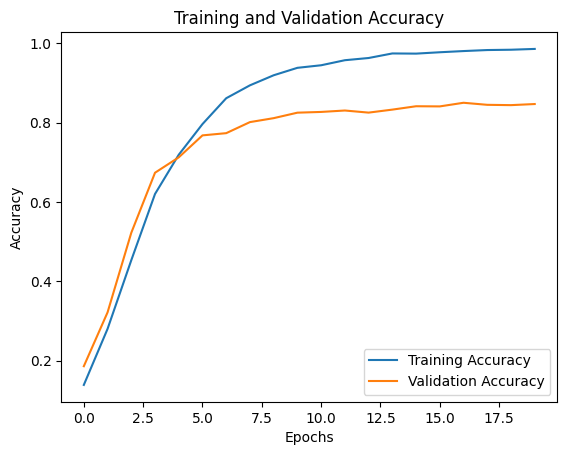

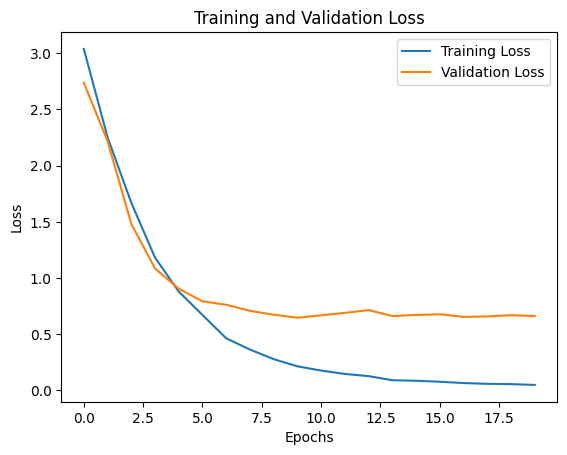

In [44]:
# Evaluate model performance on the test data
test_loss, test_accuracy = model_with_attention.evaluate(X_test_model_1, test_labels)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Plot the training and validation accuracy
plt.plot(history_with_attention.history['accuracy'], label='Training Accuracy')
plt.plot(history_with_attention.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(history_with_attention.history['loss'], label='Training Loss')
plt.plot(history_with_attention.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:827: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 500, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


236/236 ━━━━━━━━━━━━━━━━━━━━ 43s 178ms/step
Model F1 Score (Weighted): 0.8506
Macro-averaged PR-AUC: 0.8958


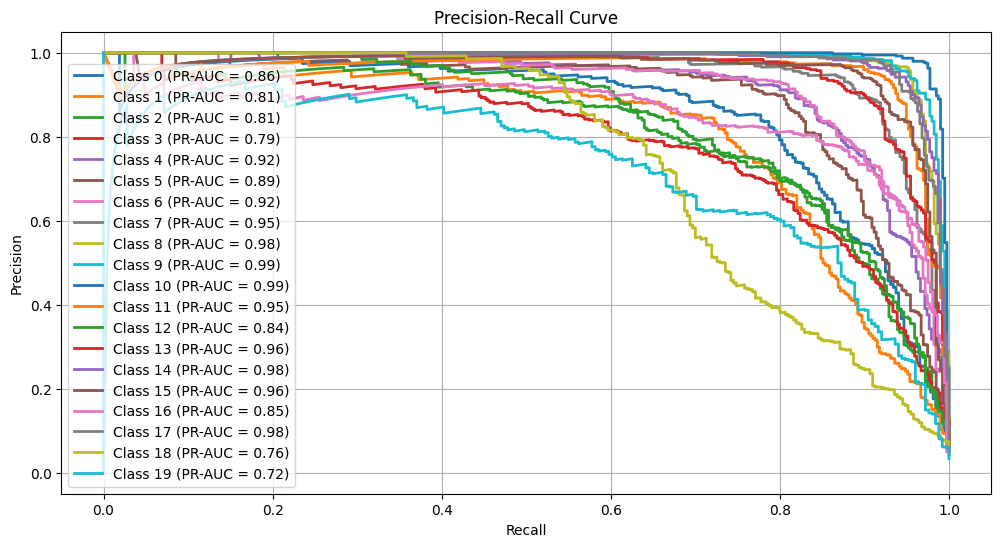

Macro-averaged ROC-AUC: 0.9881


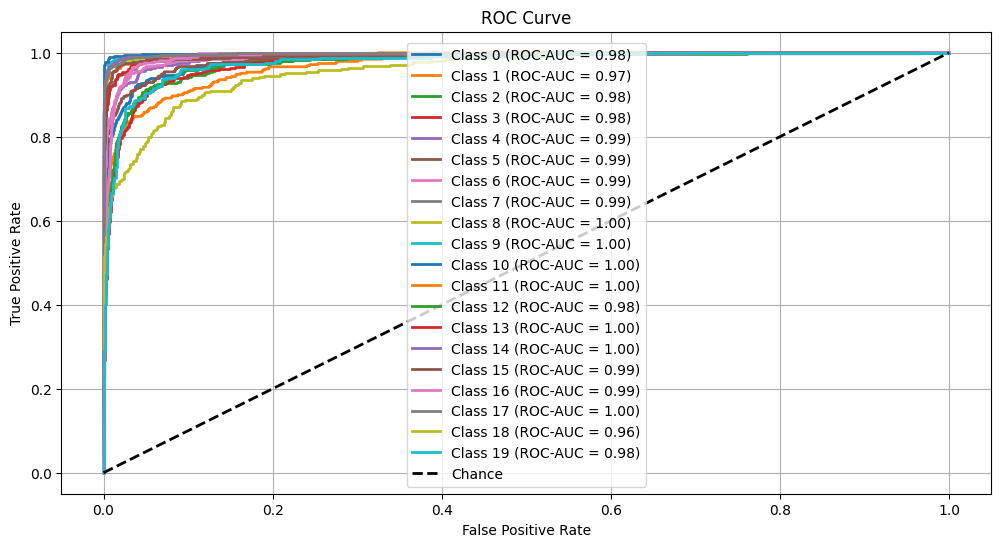

In [34]:
# Predict probabilities for the test set
y_pred_prob = model_with_attention.predict(X_test_model_1)

# Convert test labels to binary format for multi-class evaluation
test_labels_binarized = label_binarize(test_labels, classes=range(len(label_encoder.classes_)))

# 1. F1 Score
# Convert predicted probabilities to class predictions
y_pred_class = np.argmax(y_pred_prob, axis=1)
f1_model = f1_score(test_labels, y_pred_class, average='weighted')  # Weighted F1 score to handle class imbalance
print(f'Model F1 Score (Weighted): {f1_model:.4f}')

# Number of classes
n_classes = len(label_encoder.classes_)

# Initialize lists to store PR-AUC and ROC-AUC scores
pr_auc_scores = []
roc_auc_scores = []

# Precision-Recall Curve and PR-AUC
plt.figure(figsize=(12, 6))
for i in range(n_classes):
    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(test_labels_binarized[:, i], y_pred_prob[:, i])
    pr_auc = auc(recall, precision)  # PR-AUC for each class
    pr_auc_scores.append(pr_auc)
    plt.plot(recall, precision, lw=2, label=f'Class {i} (PR-AUC = {pr_auc:.2f})')

# Macro-averaged PR-AUC
macro_pr_auc = np.mean(pr_auc_scores)
print(f"Macro-averaged PR-AUC: {macro_pr_auc:.4f}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

# ROC Curve and ROC-AUC
plt.figure(figsize=(12, 6))
for i in range(n_classes):
    # ROC Curve
    fpr, tpr, _ = roc_curve(test_labels_binarized[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)  # ROC-AUC for each class
    roc_auc_scores.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (ROC-AUC = {roc_auc:.2f})')

# Macro-averaged ROC-AUC
macro_roc_auc = np.mean(roc_auc_scores)
print(f"Macro-averaged ROC-AUC: {macro_roc_auc:.4f}")

plt.plot([0, 1], [0, 1], 'k--', lw=2, label="Chance")  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

# CNN  Based Text Classification Model

# CNN Text Classifier

In [12]:
# Input layer
input_layer_cnn = Input(shape=(max_seq_length,), name="Input_Layer")

# Embedding layer
embedding_layer_cnn = Embedding(input_dim=max_words, 
                                 output_dim=embedding_dim, 
                                 input_length=max_seq_length, 
                                 weights=[embedding_matrix_model_1],
                                 trainable=False)(input_layer_cnn)

# Convolutional layers
conv_layer_cnn = Conv1D(filters=128, kernel_size=5, activation='relu', name="Conv_Layer")(embedding_layer_cnn)
pooling_layer_cnn = GlobalMaxPooling1D(name="Global_Max_Pooling")(conv_layer_cnn)

# Fully connected layers
dense_layer_cnn = Dense(64, activation='relu', name="Dense_Layer")(pooling_layer_cnn)
dropout_layer_cnn = Dropout(0.5, name="Dropout_Layer")(dense_layer_cnn)
output_layer_cnn = Dense(len(label_encoder.classes_), activation='softmax', name="Output_Layer")(dropout_layer_cnn)

# Create the model
cnn_model = Model(inputs=input_layer_cnn, outputs=output_layer_cnn, name="CNN_Text_Classifier")

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Print the model summary
cnn_model.summary()

# Train the model
history_cnn = cnn_model.fit(X_train_model_1, train_labels, 
                            batch_size=64, 
                            epochs=50, 
                            validation_data=(X_test_model_1, test_labels))

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "CNN_Text_Classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)             │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 500, 100)            │       2,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv_Layer (Conv1D)                  │ (None, 496, 128)            │          64,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Global_Max_Pooling                   │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_Layer (Dense)                  │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_Layer (Dropout)              │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 20)                  │           1,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,073,684 (7.91 MB)

 Trainable params: 73,684 (287.83 KB)

 Non-trainable params: 2,000,000 (7.63 MB)

Epoch 1/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 19s 98ms/step - accuracy: 0.1333 - loss: 2.8495 - val_accuracy: 0.4806 - val_loss: 1.8370
Epoch 2/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 20s 97ms/step - accuracy: 0.4028 - loss: 1.8391 - val_accuracy: 0.6025 - val_loss: 1.3296
Epoch 3/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 17s 97ms/step - accuracy: 0.5276 - loss: 1.4000 - val_accuracy: 0.6361 - val_loss: 1.1461
Epoch 4/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.6116 - loss: 1.1591 - val_accuracy: 0.6669 - val_loss: 1.0396
Epoch 5/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - accuracy: 0.6742 - loss: 0.9729 - val_accuracy: 0.6836 - val_loss: 0.9918
Epoch 6/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 17s 98ms/step - accuracy: 0.7182 - loss: 0.8279 - val_accuracy: 0.7021 - val_loss: 0.9394
Epoch 7/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - accuracy: 0.7631 - loss: 0.7217 - val_accuracy: 0.7148 - val_loss: 0.9064
Epoch 8/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - accuracy: 0.7987 - loss: 0.6211 - 

236/236 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.7282 - loss: 1.8811
Test Loss: 1.8838540315628052
Test Accuracy: 0.7245087623596191


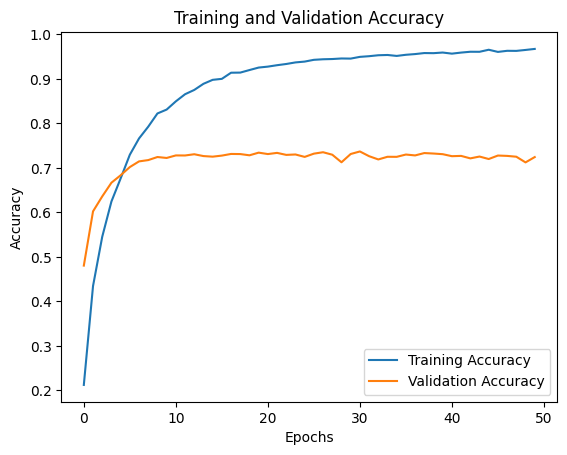

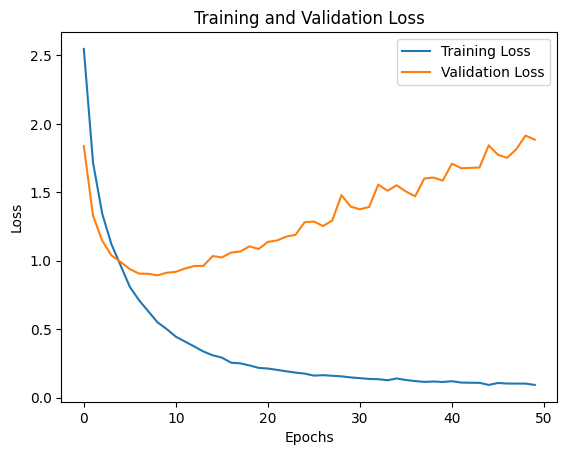

In [13]:
# Evaluate model performance on the test data
test_loss, test_accuracy = cnn_model.evaluate(X_test_model_1, test_labels)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Plot the training and validation accuracy
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

236/236 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step
Model F1 Score (Weighted): 0.7257
Macro-averaged PR-AUC: 0.7758


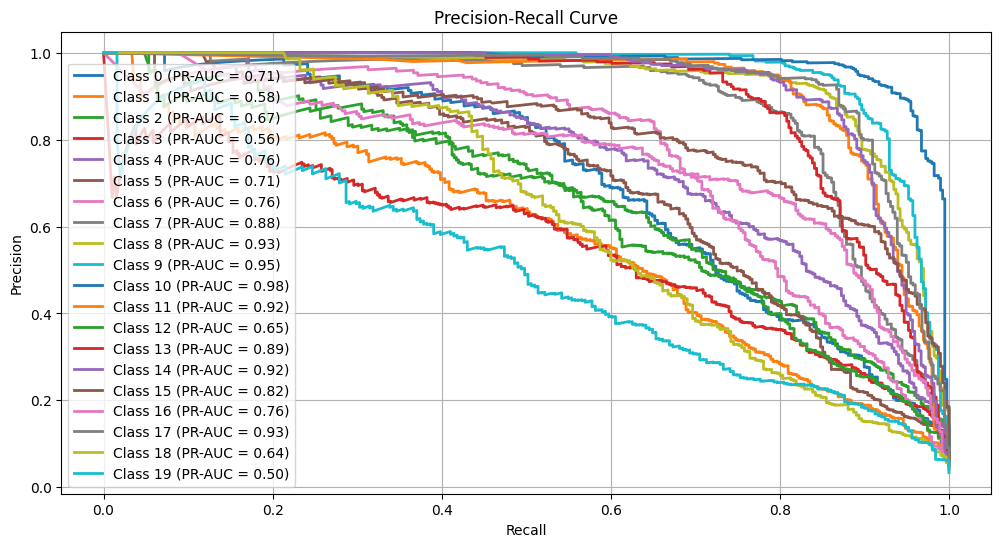

Macro-averaged ROC-AUC: 0.9704


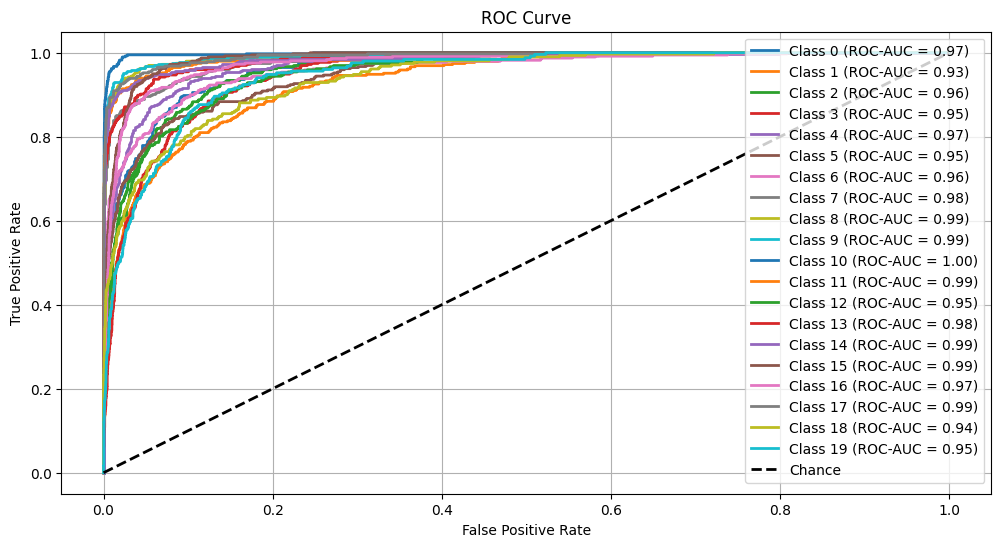

In [14]:
# Predict probabilities for the test set
y_pred_prob = cnn_model.predict(X_test_model_1)

# Convert test labels to binary format for multi-class evaluation
test_labels_binarized = label_binarize(test_labels, classes=range(len(label_encoder.classes_)))

# 1. F1 Score
# Convert predicted probabilities to class predictions
y_pred_class = np.argmax(y_pred_prob, axis=1)
f1_model = f1_score(test_labels, y_pred_class, average='weighted')  # Weighted F1 score to handle class imbalance
print(f'Model F1 Score (Weighted): {f1_model:.4f}')

# Number of classes
n_classes = len(label_encoder.classes_)

# Initialize lists to store PR-AUC and ROC-AUC scores
pr_auc_scores = []
roc_auc_scores = []

# Precision-Recall Curve and PR-AUC
plt.figure(figsize=(12, 6))
for i in range(n_classes):
    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(test_labels_binarized[:, i], y_pred_prob[:, i])
    pr_auc = auc(recall, precision)  # PR-AUC for each class
    pr_auc_scores.append(pr_auc)
    plt.plot(recall, precision, lw=2, label=f'Class {i} (PR-AUC = {pr_auc:.2f})')

# Macro-averaged PR-AUC
macro_pr_auc = np.mean(pr_auc_scores)
print(f"Macro-averaged PR-AUC: {macro_pr_auc:.4f}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

# ROC Curve and ROC-AUC
plt.figure(figsize=(12, 6))
for i in range(n_classes):
    # ROC Curve
    fpr, tpr, _ = roc_curve(test_labels_binarized[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)  # ROC-AUC for each class
    roc_auc_scores.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (ROC-AUC = {roc_auc:.2f})')

# Macro-averaged ROC-AUC
macro_roc_auc = np.mean(roc_auc_scores)
print(f"Macro-averaged ROC-AUC: {macro_roc_auc:.4f}")

plt.plot([0, 1], [0, 1], 'k--', lw=2, label="Chance")  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

# CNN Plus Attention Layer and Gradient Clipping

In [42]:
# Input Layer
input_layer_cnn = Input(shape=(max_seq_length,), name="Input_Layer")
embedding_layer_cnn = Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_seq_length, weights=[embedding_matrix_model_1], trainable=True)(input_layer_cnn)

# Convolutional Layers with Same Padding
conv_layer_1 = Conv1D(filters=128, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01), padding='same')(embedding_layer_cnn)
conv_layer_2 = Conv1D(filters=128, kernel_size=5, activation='relu', kernel_regularizer=l2(0.01), padding='same')(embedding_layer_cnn)
conv_layer_3 = Conv1D(filters=128, kernel_size=7, activation='relu', kernel_regularizer=l2(0.01), padding='same')(embedding_layer_cnn)

# Merging the Convolutional Layers
merged_layer = Concatenate()([conv_layer_1, conv_layer_2, conv_layer_3])

# Attention Mechanism
attention_scores = Dense(1, activation='tanh')(merged_layer)
attention_weights = Activation('softmax')(attention_scores)
context_vector = Multiply()([merged_layer, attention_weights])
context_vector = GlobalMaxPooling1D()(context_vector)  # Pooling after attention

# Combine the context vector with the previous layers
combined_layer = Concatenate()([context_vector, GlobalMaxPooling1D()(merged_layer)])

# Fully Connected Layer with Dropout
dense_layer = Dense(64, activation='relu')(combined_layer)
dropout_layer = Dropout(0.5)(dense_layer)

# Output Layer
output_layer = Dense(len(label_encoder.classes_), activation='softmax')(dropout_layer)

# Final Model
cnn_model_with_attention = Model(inputs=input_layer_cnn, outputs=output_layer)
cnn_model_with_attention.compile(optimizer=Adam(clipvalue=1.0), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
cnn_model_with_attention.summary()

# Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Train the Model
cnn_history = cnn_model_with_attention.fit(X_train_model_1, train_labels, epochs=20, validation_data=(X_test_model_1, test_labels), callbacks=[lr_scheduler])


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)      │ (None, 500)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_13 (Embedding)      │ (None, 500, 100)          │       2,000,000 │ Input_Layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_15 (Conv1D)            │ (None, 500, 128)          │          38,528 │ embedding_13[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_16 (Conv1D)            │ (None, 500, 128)          │          64,128 │ embedding_13[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_17 (Conv1D)            │ (None, 500, 128)          │          89,728 │ embedding_13[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_8 (Concatenate)   │ (None, 500, 384)          │               0 │ conv1d_15[0][0],           │
│                               │                           │                 │ conv1d_16[0][0],           │
│                               │                           │                 │ conv1d_17[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_24 (Dense)              │ (None, 500, 1)            │             385 │ concatenate_8[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_4 (Activation)     │ (None, 500, 1)            │               0 │ dense_24[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multiply_5 (Multiply)         │ (None, 500, 384)          │               0 │ concatenate_8[0][0],       │
│                               │                           │                 │ activation_4[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_max_pooling1d_6        │ (None, 384)               │               0 │ multiply_5[0][0]           │
│ (GlobalMaxPooling1D)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_max_pooling1d_7        │ (None, 384)               │               0 │ concatenate_8[0][0]        │
│ (GlobalMaxPooling1D)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_9 (Concatenate)   │ (None, 768)               │               0 │ global_max_pooling1d_6[0]… │
│                               │                           │                 │ global_max_pooling1d_7[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_25 (Dense)              │ (None, 64)                │          49,216 │ concatenate_9[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_9 (Dropout)           │ (None, 64)                │               0 │ dense_25[0][0]             │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 2,243,285 (8.56 MB)

 Trainable params: 2,243,285 (8.56 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
354/354 ━━━━━━━━━━━━━━━━━━━━ 109s 299ms/step - accuracy: 0.0788 - loss: 4.5228 - val_accuracy: 0.2200 - val_loss: 2.6175 - learning_rate: 0.0010
Epoch 2/20
354/354 ━━━━━━━━━━━━━━━━━━━━ 139s 290ms/step - accuracy: 0.1473 - loss: 2.6529 - val_accuracy: 0.3852 - val_loss: 2.0801 - learning_rate: 0.0010
Epoch 3/20
354/354 ━━━━━━━━━━━━━━━━━━━━ 147s 303ms/step - accuracy: 0.3092 - loss: 2.2445 - val_accuracy: 0.6115 - val_loss: 1.6824 - learning_rate: 0.0010
Epoch 4/20
354/354 ━━━━━━━━━━━━━━━━━━━━ 114s 321ms/step - accuracy: 0.4509 - loss: 1.8533 - val_accuracy: 0.6771 - val_loss: 1.4222 - learning_rate: 0.0010
Epoch 5/20
354/354 ━━━━━━━━━━━━━━━━━━━━ 132s 293ms/step - accuracy: 0.5474 - loss: 1.6462 - val_accuracy: 0.7361 - val_loss: 1.3201 - learning_rate: 0.0010
Epoch 6/20
354/354 ━━━━━━━━━━━━━━━━━━━━ 141s 291ms/step - accuracy: 0.6255 - loss: 1.4392 - val_accuracy: 0.7496 - val_loss: 1.3071 - learning_rate: 0.0010
Epoch 7/20
354/354 ━━━━━━━━━━━━━━━━━━━━ 105s 297ms/step - accura

236/236 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - accuracy: 0.8070 - loss: 0.9567
Test Loss: 0.9637433290481567
Test Accuracy: 0.8104089498519897


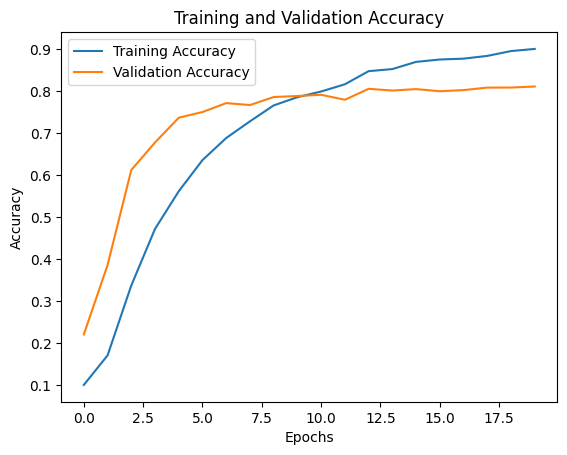

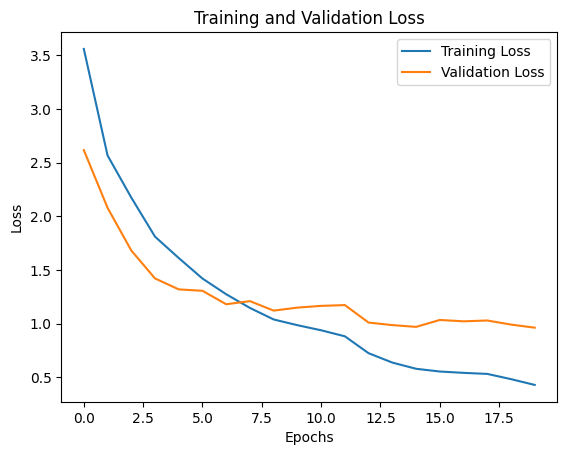

In [43]:
# Evaluate the model on the test data
test_loss, test_accuracy = cnn_model_with_attention.evaluate(X_test_model_1, test_labels)

# Print the test accuracy and loss
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


# Plot the training and validation accuracy
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:827: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 500, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:827: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 500, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


236/236 ━━━━━━━━━━━━━━━━━━━━ 17s 70ms/step
Model F1 Score (Weighted): 0.8119
Macro-averaged PR-AUC: 0.8655


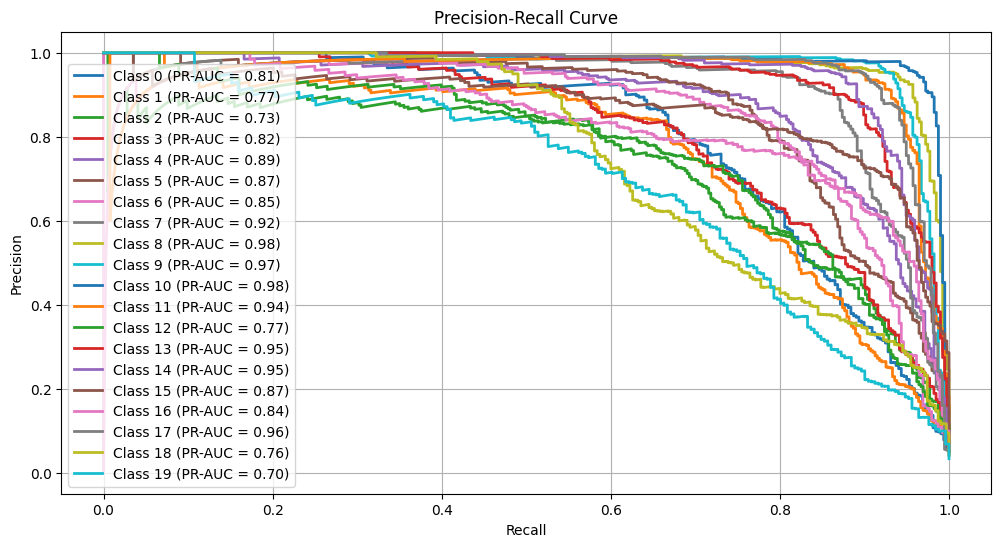

Macro-averaged ROC-AUC: 0.9843


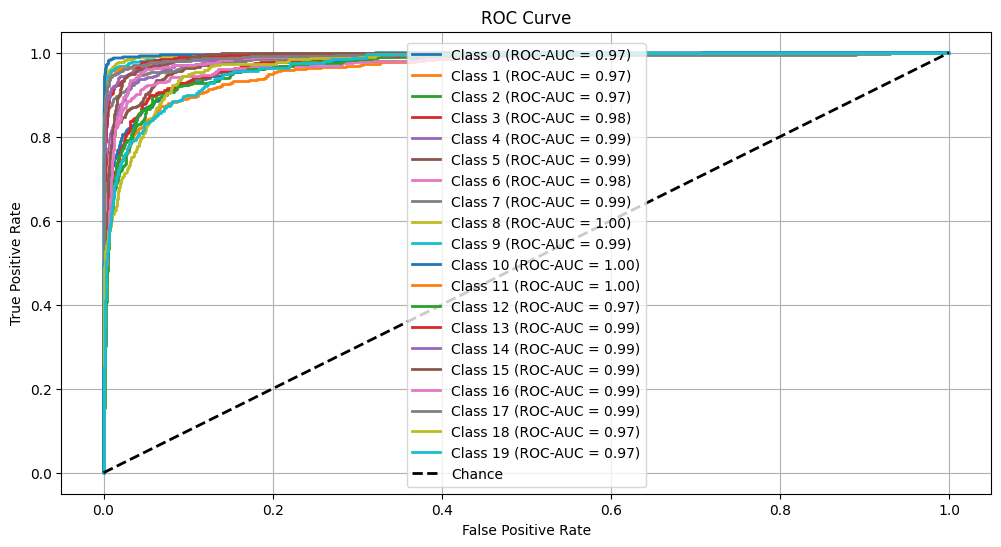

In [47]:
# Predict probabilities for the test set
y_pred_prob = cnn_model_with_attention.predict(X_test_model_1)

# Convert test labels to binary format for multi-class evaluation
test_labels_binarized = label_binarize(test_labels, classes=range(len(label_encoder.classes_)))

# 1. F1 Score
# Convert predicted probabilities to class predictions
y_pred_class = np.argmax(y_pred_prob, axis=1)
f1_model = f1_score(test_labels, y_pred_class, average='weighted')  # Weighted F1 score to handle class imbalance
print(f'Model F1 Score (Weighted): {f1_model:.4f}')

# Number of classes
n_classes = len(label_encoder.classes_)

# Initialize lists to store PR-AUC and ROC-AUC scores
pr_auc_scores = []
roc_auc_scores = []

# Precision-Recall Curve and PR-AUC
plt.figure(figsize=(12, 6))
for i in range(n_classes):
    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(test_labels_binarized[:, i], y_pred_prob[:, i])
    pr_auc = auc(recall, precision)  # PR-AUC for each class
    pr_auc_scores.append(pr_auc)
    plt.plot(recall, precision, lw=2, label=f'Class {i} (PR-AUC = {pr_auc:.2f})')

# Macro-averaged PR-AUC
macro_pr_auc = np.mean(pr_auc_scores)
print(f"Macro-averaged PR-AUC: {macro_pr_auc:.4f}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

# ROC Curve and ROC-AUC
plt.figure(figsize=(12, 6))
for i in range(n_classes):
    # ROC Curve
    fpr, tpr, _ = roc_curve(test_labels_binarized[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)  # ROC-AUC for each class
    roc_auc_scores.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (ROC-AUC = {roc_auc:.2f})')

# Macro-averaged ROC-AUC
macro_roc_auc = np.mean(roc_auc_scores)
print(f"Macro-averaged ROC-AUC: {macro_roc_auc:.4f}")

plt.plot([0, 1], [0, 1], 'k--', lw=2, label="Chance")  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

# CNN Plus Attention Layer, GRU and Gradient Clipping

In [52]:
# Input Layer
input_layer_cnn = Input(shape=(max_seq_length,), name="Input_Layer")
embedding_layer_cnn = Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_seq_length, weights=[embedding_matrix_model_1], trainable=True)(input_layer_cnn)

# Convolutional Layers with Different Kernel Sizes
conv_layer_1 = Conv1D(filters=128, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01))(embedding_layer_cnn)
conv_layer_2 = Conv1D(filters=128, kernel_size=5, activation='relu', kernel_regularizer=l2(0.01))(embedding_layer_cnn)
conv_layer_3 = Conv1D(filters=128, kernel_size=7, activation='relu', kernel_regularizer=l2(0.01))(embedding_layer_cnn)

# Padding to make the sequence lengths the same
conv_layer_1_padded = ZeroPadding1D(padding=(2, 2))(conv_layer_1)  # Pad to make length match
conv_layer_2_padded = ZeroPadding1D(padding=(3, 3))(conv_layer_2)  # Pad to make length match
conv_layer_3_padded = ZeroPadding1D(padding=(4, 4))(conv_layer_3)  # Pad to make length match

# Merging the Convolutional Layers
merged_layer = Concatenate()([conv_layer_1_padded, conv_layer_2_padded, conv_layer_3_padded])

# GRU Layer
gru_layer = GRU(64, return_sequences=True)(merged_layer)

# Attention Mechanism
attention_scores = Dense(1, activation='tanh')(gru_layer)
attention_weights = Activation('sigmoid')(attention_scores)
context_vector = Multiply()([gru_layer, attention_weights])
context_vector = GlobalMaxPooling1D()(context_vector)  # Pooling after attention

# Combine the context vector with the previous layers
combined_layer = Concatenate()([context_vector, GlobalMaxPooling1D()(merged_layer)])

# Fully Connected Layer with Dropout
dense_layer = Dense(64, activation='relu')(combined_layer)
dropout_layer = Dropout(0.5)(dense_layer)

# Output Layer
output_layer = Dense(len(label_encoder.classes_), activation='softmax')(dropout_layer)

# Final Model
cnn_model_with_attention_and_gru = Model(inputs=input_layer_cnn, outputs=output_layer)
cnn_model_with_attention_and_gru.compile(optimizer=Adam(clipvalue=1.0), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
cnn_model_with_attention_and_gru.summary()

# Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Train the Model
cnn_history_gru = cnn_model_with_attention_and_gru.fit(X_train_model_1, train_labels, epochs=30, validation_data=(X_test_model_1, test_labels), callbacks=[lr_scheduler])


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)      │ (None, 500)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_17 (Embedding)      │ (None, 500, 100)          │       2,000,000 │ Input_Layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_27 (Conv1D)            │ (None, 498, 128)          │          38,528 │ embedding_17[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_28 (Conv1D)            │ (None, 496, 128)          │          64,128 │ embedding_17[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_29 (Conv1D)            │ (None, 494, 128)          │          89,728 │ embedding_17[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding1d_6              │ (None, 502, 128)          │               0 │ conv1d_27[0][0]            │
│ (ZeroPadding1D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding1d_7              │ (None, 502, 128)          │               0 │ conv1d_28[0][0]            │
│ (ZeroPadding1D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding1d_8              │ (None, 502, 128)          │               0 │ conv1d_29[0][0]            │
│ (ZeroPadding1D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_15 (Concatenate)  │ (None, 502, 384)          │               0 │ zero_padding1d_6[0][0],    │
│                               │                           │                 │ zero_padding1d_7[0][0],    │
│                               │                           │                 │ zero_padding1d_8[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gru_2 (GRU)                   │ (None, 502, 64)           │          86,400 │ concatenate_15[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_33 (Dense)              │ (None, 502, 1)            │              65 │ gru_2[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_7 (Activation)     │ (None, 502, 1)            │               0 │ dense_33[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multiply_8 (Multiply)         │ (None, 502, 64)           │               0 │ gru_2[0][0],               │
│                               │                           │                 │ activation_7[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_max_pooling1d_12       │ (None, 64)                │               0 │ multiply_8[0][0]           │
│ (GlobalMaxPooling1D)          │                           │               

 Total params: 2,308,885 (8.81 MB)

 Trainable params: 2,308,885 (8.81 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 246s 684ms/step - accuracy: 0.1039 - loss: 4.5984 - val_accuracy: 0.3783 - val_loss: 2.3213 - learning_rate: 0.0010
Epoch 2/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 253s 715ms/step - accuracy: 0.3268 - loss: 2.2749 - val_accuracy: 0.6641 - val_loss: 1.5439 - learning_rate: 0.0010
Epoch 3/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 259s 707ms/step - accuracy: 0.5799 - loss: 1.6036 - val_accuracy: 0.7139 - val_loss: 1.3021 - learning_rate: 0.0010
Epoch 4/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 261s 703ms/step - accuracy: 0.7302 - loss: 1.2227 - val_accuracy: 0.7714 - val_loss: 1.1142 - learning_rate: 0.0010
Epoch 5/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 262s 702ms/step - accuracy: 0.8038 - loss: 0.9918 - val_accuracy: 0.7813 - val_loss: 1.1198 - learning_rate: 0.0010
Epoch 6/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 263s 704ms/step - accuracy: 0.8585 - loss: 0.8264 - val_accuracy: 0.8034 - val_loss: 1.0574 - learning_rate: 0.0010
Epoch 7/30
354/354 ━━━━━━━━━━━━━━━━━━━━ 261s 701ms/step - accura

236/236 ━━━━━━━━━━━━━━━━━━━━ 45s 191ms/step - accuracy: 0.8212 - loss: 0.9063
Test Loss: 0.9318383932113647
Test Accuracy: 0.8203664422035217


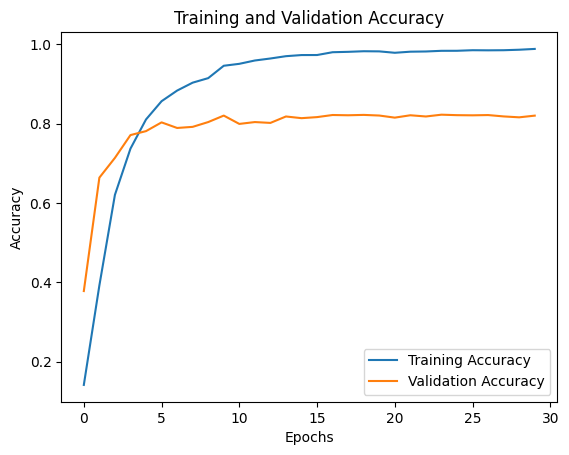

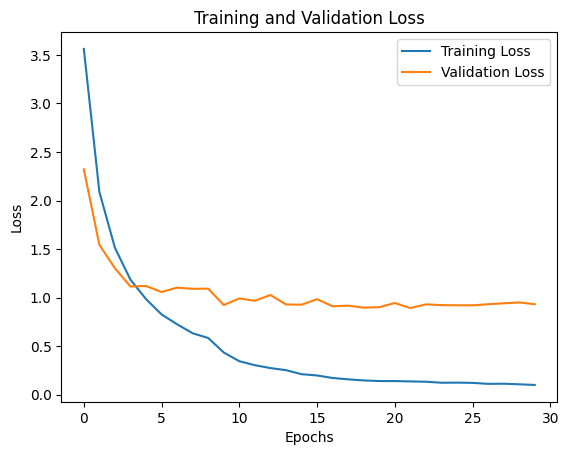

In [53]:
# Evaluate the model on the test data
test_loss, test_accuracy = cnn_model_with_attention_and_gru.evaluate(X_test_model_1, test_labels)

# Print the test accuracy and loss
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Plot the training and validation accuracy
plt.plot(cnn_history_gru.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history_gru.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(cnn_history_gru.history['loss'], label='Training Loss')
plt.plot(cnn_history_gru.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

236/236 ━━━━━━━━━━━━━━━━━━━━ 48s 203ms/step
Model F1 Score (Weighted): 0.8213
Macro-averaged PR-AUC: 0.8817


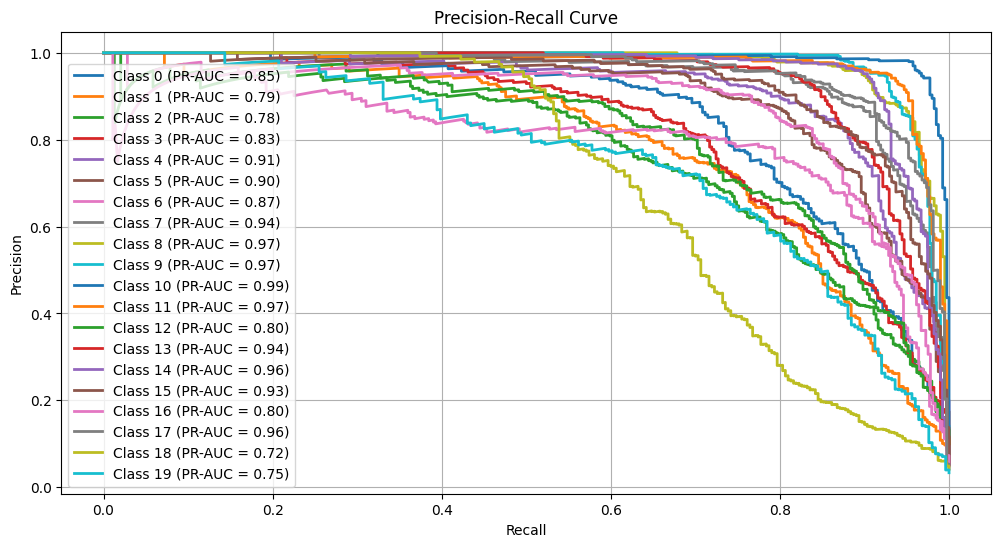

Macro-averaged ROC-AUC: 0.9855


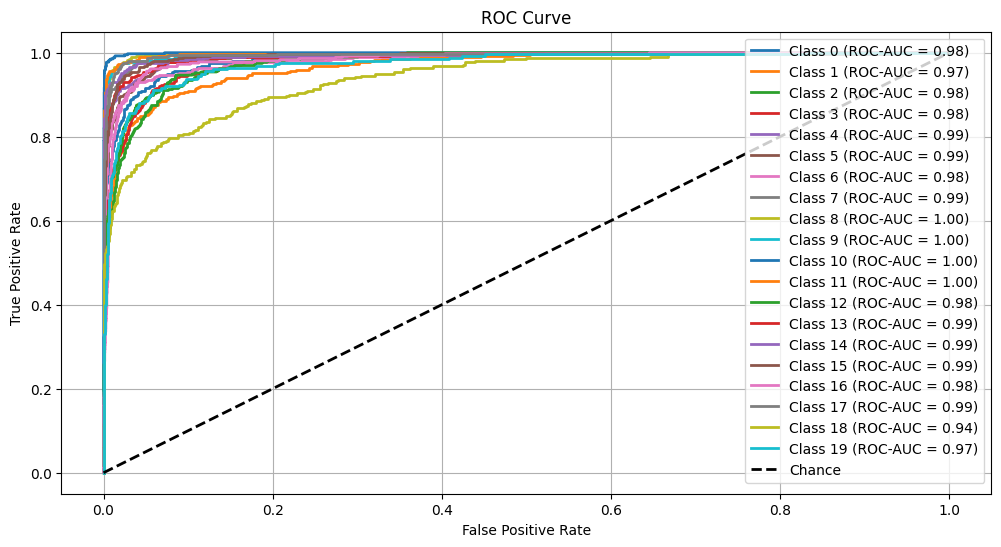

In [54]:
# Predict probabilities for the test set
y_pred_prob = cnn_model_with_attention_and_gru.predict(X_test_model_1)

# Convert test labels to binary format for multi-class evaluation
test_labels_binarized = label_binarize(test_labels, classes=range(len(label_encoder.classes_)))

# 1. F1 Score
# Convert predicted probabilities to class predictions
y_pred_class = np.argmax(y_pred_prob, axis=1)
f1_model = f1_score(test_labels, y_pred_class, average='weighted')  # Weighted F1 score to handle class imbalance
print(f'Model F1 Score (Weighted): {f1_model:.4f}')

# Number of classes
n_classes = len(label_encoder.classes_)

# Initialize lists to store PR-AUC and ROC-AUC scores
pr_auc_scores = []
roc_auc_scores = []

# Precision-Recall Curve and PR-AUC
plt.figure(figsize=(12, 6))
for i in range(n_classes):
    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(test_labels_binarized[:, i], y_pred_prob[:, i])
    pr_auc = auc(recall, precision)  # PR-AUC for each class
    pr_auc_scores.append(pr_auc)
    plt.plot(recall, precision, lw=2, label=f'Class {i} (PR-AUC = {pr_auc:.2f})')

# Macro-averaged PR-AUC
macro_pr_auc = np.mean(pr_auc_scores)
print(f"Macro-averaged PR-AUC: {macro_pr_auc:.4f}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

# ROC Curve and ROC-AUC
plt.figure(figsize=(12, 6))
for i in range(n_classes):
    # ROC Curve
    fpr, tpr, _ = roc_curve(test_labels_binarized[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)  # ROC-AUC for each class
    roc_auc_scores.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (ROC-AUC = {roc_auc:.2f})')

# Macro-averaged ROC-AUC
macro_roc_auc = np.mean(roc_auc_scores)
print(f"Macro-averaged ROC-AUC: {macro_roc_auc:.4f}")

plt.plot([0, 1], [0, 1], 'k--', lw=2, label="Chance")  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

# Model Performance Comparison

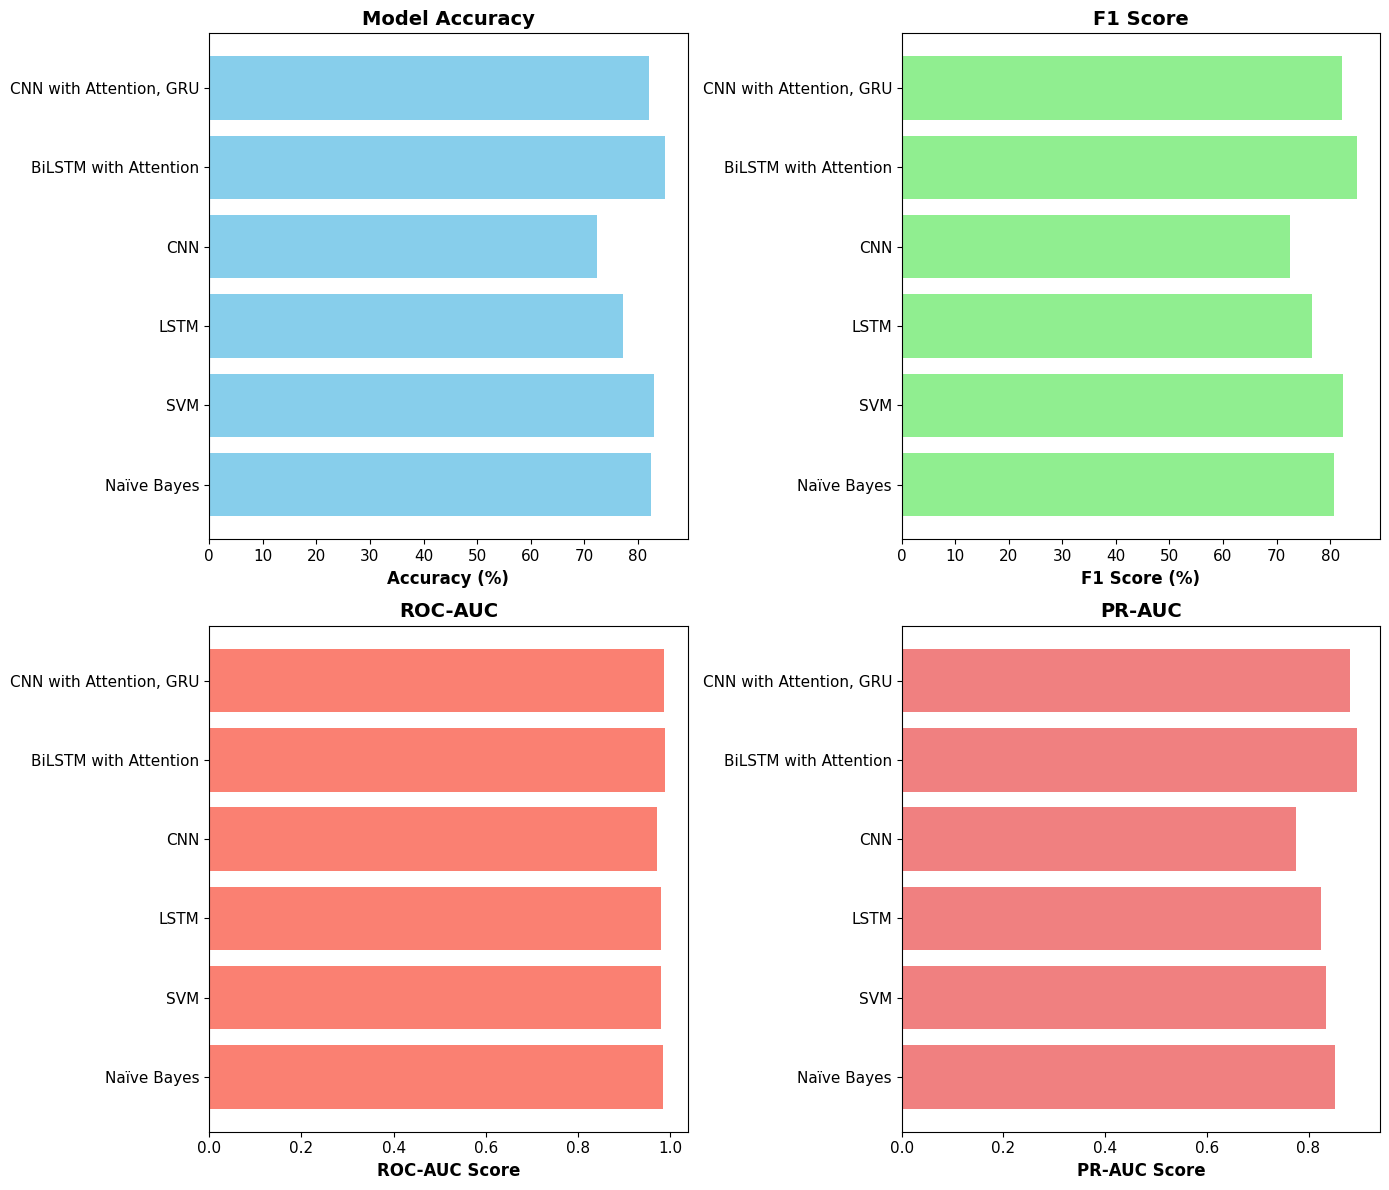

In [2]:
# Data for the models' performance
models = ['Naïve Bayes', 'SVM', 'LSTM', 'CNN', 'BiLSTM with Attention', 'CNN with Attention, GRU']
accuracy = [82.38, 82.93, 77.32, 72.45, 85.02, 82.04]
f1_score = [80.77, 82.37, 76.67, 72.57, 85.06, 82.13]
roc_auc = [0.9846, 0.9802, 0.9796, 0.9704, 0.9881, 0.9855]
pr_auc = [0.8526, 0.8340, 0.8243, 0.7758, 0.8958, 0.8817]

# Set up the figure and axis
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot Accuracy
axes[0, 0].barh(models, accuracy, color='skyblue')
axes[0, 0].set_title('Model Accuracy', fontweight='bold', fontsize=14)
axes[0, 0].set_xlabel('Accuracy (%)', fontweight='bold', fontsize=12)
axes[0, 0].tick_params(axis='x', labelsize=11)
axes[0, 0].tick_params(axis='y', labelsize=11)

# Plot F1 Score
axes[0, 1].barh(models, f1_score, color='lightgreen')
axes[0, 1].set_title('F1 Score', fontweight='bold', fontsize=14)
axes[0, 1].set_xlabel('F1 Score (%)', fontweight='bold', fontsize=12)
axes[0, 1].tick_params(axis='x', labelsize=11)
axes[0, 1].tick_params(axis='y', labelsize=11)

# Plot ROC-AUC
axes[1, 0].barh(models, roc_auc, color='salmon')
axes[1, 0].set_title('ROC-AUC', fontweight='bold', fontsize=14)
axes[1, 0].set_xlabel('ROC-AUC Score', fontweight='bold', fontsize=12)
axes[1, 0].tick_params(axis='x', labelsize=11)
axes[1, 0].tick_params(axis='y', labelsize=11)

# Plot PR-AUC
axes[1, 1].barh(models, pr_auc, color='lightcoral')
axes[1, 1].set_title('PR-AUC', fontweight='bold', fontsize=14)
axes[1, 1].set_xlabel('PR-AUC Score', fontweight='bold', fontsize=12)
axes[1, 1].tick_params(axis='x', labelsize=11)
axes[1, 1].tick_params(axis='y', labelsize=11)

# Adjust layout
plt.tight_layout()

# Save the plot as an image
plt.savefig('model_performance_comparison_bold.png')

plt.show()

# Flow Chart of the Methodology

In [8]:
# Create a new directed graph with flowchart style
dot = Digraph(format='png', engine='dot')

# Add nodes for each step in the methodology
dot.node('A', 'Dataset Collection\n(20 Newsgroups Dataset)', shape='box', style='filled', fillcolor='lightblue')
dot.node('B', 'Preprocessing\n(Tokenization, Stopword Removal, Lemmatization)', shape='box', style='filled', fillcolor='lightgreen')
dot.node('C', 'Feature Extraction\n(TF-IDF Vectorization)', shape='box', style='filled', fillcolor='lightcoral')
dot.node('D', 'Model Selection\n(Traditional: Naive Bayes, SVM\nDeep Learning: LSTM-Based Model, CNN-Based Model)', shape='box', style='filled', fillcolor='lightyellow')
dot.node('E', 'Model Training and Tuning\n(Hyperparameter Tuning)', shape='box', style='filled', fillcolor='lightpink')
dot.node('F', 'Model Evaluation\n(Accuracy, Precision, Recall, F1-Score)', shape='box', style='filled', fillcolor='lightgrey')
dot.node('G', 'Results Comparison\n(Compare Traditional and Deep Learning Models)', shape='box', style='filled', fillcolor='lightgoldenrodyellow')

# Add edges to connect the steps with arrows
dot.edge('A', 'B', label='1', color='blue', fontcolor='blue', style='dashed')
dot.edge('B', 'C', label='2', color='green', fontcolor='green', style='dashed')
dot.edge('C', 'D', label='3', color='red', fontcolor='red', style='dashed')
dot.edge('D', 'E', label='4', color='purple', fontcolor='purple', style='dashed')
dot.edge('E', 'F', label='5', color='orange', fontcolor='orange', style='dashed')
dot.edge('F', 'G', label='6', color='brown', fontcolor='brown', style='dashed')

# Render the flowchart to a PNG file
dot.render('methodology_flowchart', format='png', cleanup=True)

# Display the flowchart
dot.view('methodology_flowchart.png')

'methodology_flowchart.png.png'